# Analysis of the text2video benchmark results

In [1]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp_'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)

exp1_df = pd.concat(dfs, ignore_index=True)
exp1_df['energy_generate_gpu'] = exp1_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp1_df.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp1_df['runs'] = 5
exp1_df['cpu_count'] = 8
exp1_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp1_df['gpu_count'] = 1
exp1_df['gpu_model'] = 'NVIDIA H100 80GB HBM3'




In [33]:
exp1_df

,model_name,duration_generate,energy_generate_cpu,energy_generate_ram,prompt,num_frames,runs,out_video,out_csv,fps,...,downscaled_width,generate_steps,denoise_steps,denoise_strength,decode_timestep,image_cond_noise_scale,cpu_count,cpu_model,gpu_count,gpu_model
0,Mochi-1-preview,274.606496,0.006682,0.002900,An underwater coral reef with colorful fish,84.0,5,exp_Mochi-1-preview_output_prompt6_2025-06-18_...,exp_Mochi-1-preview_results_prompt6_2025-06-18...,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
1,CogVideoX-5b,123.398941,0.002911,0.001304,A serene beach at sunrise with gentle waves,49.0,5,exp_CogVideoX-5b_output_prompt2_2025-06-18_12-...,exp_CogVideoX-5b_results_prompt2_2025-06-18_12...,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
2,CogVideoX-5b,123.632510,0.002987,0.001306,A medieval castle on a cliff during a thunders...,49.0,5,exp_CogVideoX-5b_output_prompt7_2025-06-18_13-...,exp_CogVideoX-5b_results_prompt7_2025-06-18_13...,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
3,WAN2.1-T2V-1.3B-Diffusers,102.735611,0.001879,0.001086,A serene beach at sunrise with gentle waves,81.0,5,exp_WAN2.1-T2V-1.3B-Diffusers_output_prompt2_2...,exp_WAN2.1-T2V-1.3B-Diffusers_results_prompt2_...,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
4,AnimateDiff,0.703856,0.000016,0.000008,A peaceful rural village in spring with bloomi...,NaN,5,NaN,exp_AnimateDiff_results_prompt8_2025-06-18_12-...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,CogVideoX-2b,51.000796,0.001338,0.000539,A dense jungle with exotic animals and mist,49.0,5,exp_CogVideoX-2b_output_prompt3_2025-06-19_08-...,exp_CogVideoX-2b_results_prompt3_2025-06-19_08...,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
66,WAN2.1-T2V-14B-Diffusers,490.547817,0.010802,0.005179,"A futuristic cityscape at night, neon lights r...",81.0,5,exp_WAN2.1-T2V-14B-Diffusers_output_prompt1_20...,exp_WAN2.1-T2V-14B-Diffusers_results_prompt1_2...,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
67,WAN2.1-T2V-14B-Diffusers,489.694768,0.006122,0.005170,A mystical forest with glowing mushrooms and f...,81.0,5,exp_WAN2.1-T2V-14B-Diffusers_output_prompt10_2...,exp_WAN2.1-T2V-14B-Diffusers_results_prompt10_...,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
68,LTX-Video-0.9.7-dev,9.878693,0.000228,0.000105,A cyberpunk hacker in a dark alleyway with hol...,121.0,5,exp_LTX-Video-0.9.7-dev_output_prompt5_2025-06...,exp_LTX-Video-0.9.7-dev_results_prompt5_2025-0...,24.0,...,448.0,30.0,10.0,0.4,0.05,0.025,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3


In [34]:
exp1_df['model_name'].unique()

array(['Mochi-1-preview', 'CogVideoX-5b', 'WAN2.1-T2V-1.3B-Diffusers',
       'AnimateDiff', 'CogVideoX-2b', 'LTX-Video-0.9.7-dev',
       'WAN2.1-T2V-14B-Diffusers'], dtype=object)

In [35]:
exp1_df[['name_csv', 'model_name', 'duration_generate', 'energy_generate_gpu', 'energy_generate_cpu', 'energy_generate_ram', 'prompt']].sort_values(
    by=['model_name', 'prompt'])

,name_csv,model_name,duration_generate,energy_generate_gpu,energy_generate_cpu,energy_generate_ram,prompt
38,exp_AnimateDiff_results_prompt5_2025-06-18_12-...,AnimateDiff,0.687965,0.000111,0.000015,0.000008,A cyberpunk hacker in a dark alleyway with hol...
56,exp_AnimateDiff_results_prompt3_2025-06-18_12-...,AnimateDiff,0.686887,0.000112,0.000020,0.000008,A dense jungle with exotic animals and mist
48,exp_AnimateDiff_results_prompt1_2025-06-18_12-...,AnimateDiff,0.687201,0.000112,0.000015,0.000008,"A futuristic cityscape at night, neon lights r..."
7,exp_AnimateDiff_results_prompt4_2025-06-18_12-...,AnimateDiff,0.697821,0.000110,0.000024,0.000008,A majestic dragon flying over snowy mountains
43,exp_AnimateDiff_results_prompt7_2025-06-18_12-...,AnimateDiff,0.693765,0.000113,0.000022,0.000008,A medieval castle on a cliff during a thunders...
...,...,...,...,...,...,...,...
67,exp_WAN2.1-T2V-14B-Diffusers_results_prompt10_...,WAN2.1-T2V-14B-Diffusers,489.694768,0.093814,0.006122,0.005170,A mystical forest with glowing mushrooms and f...
62,exp_WAN2.1-T2V-14B-Diffusers_results_prompt8_2...,WAN2.1-T2V-14B-Diffusers,489.884060,0.093803,0.010051,0.005172,A peaceful rural village in spring with bloomi...
22,exp_WAN2.1-T2V-14B-Diffusers_results_prompt2_2...,WAN2.1-T2V-14B-Diffusers,489.559194,0.093766,0.008953,0.005169,A serene beach at sunrise with gentle waves
50,exp_WAN2.1-T2V-14B-Diffusers_results_prompt9_2...,WAN2.1-T2V-14B-Diffusers,489.528463,0.093777,0.010649,0.005168,A spaceship approaching a giant alien planet


In [36]:
exp1_df['steps'] = exp1_df.apply(
    lambda row: 64 if row['model_name'] == 'Mochi-1-preview' else
    60 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    60 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    4 if row['model_name'] == 'AnimateDiff' else
    30 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['steps'],
    axis=1
)

exp1_df['height'] = exp1_df.apply(
    lambda row: 480 if row['model_name'] == 'Mochi-1-preview' else
     480 if row['model_name'] == 'CogVideoX-5b' else
     480 if row['model_name'] == 'CogVideoX-2b' else
    480 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    480 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    512 if row['model_name'] == 'AnimateDiff' else
    512 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['height'],
    axis=1
)

exp1_df['width'] = exp1_df.apply(
    lambda row: 848 if row['model_name'] == 'Mochi-1-preview' else 
     720 if row['model_name'] == 'CogVideoX-5b' else
     720 if row['model_name'] == 'CogVideoX-2b' else
    832 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    832 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    512 if row['model_name'] == 'AnimateDiff' else
    704 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['width'],
    axis=1
)

exp1_df['fps'] = exp1_df.apply(
    lambda row: 10 if row['model_name'] == 'AnimateDiff' else
    row['fps'],
    axis=1
)

exp1_df['num_frames'] = exp1_df.apply(
    lambda row: 16 if row['model_name'] == 'AnimateDiff' else
    row['num_frames'],
    axis=1
)

exp1_df['model_hf_page'] = exp1_df.apply(
    lambda row: f"https://huggingface.co/ByteDance/AnimateDiff-Lightning" if row['model_name'] == 'AnimateDiff' else
    f"https://huggingface.co/THUDM/CogVideoX-5b" if row['model_name'] == 'CogVideoX-5b' else
    f"https://huggingface.co/THUDM/CogVideoX-2b" if row['model_name'] == 'CogVideoX-2b' else
    f"https://huggingface.co/Lightricks/LTX-Video-0.9.7-dev" if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    f"https://huggingface.co/genmo/mochi-1-preview" if row['model_name'] == 'Mochi-1-preview' else
    f"https://huggingface.co/Wan-AI/Wan2.1-T2V-1.3B-Diffusers" if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    f"https://huggingface.co/Wan-AI/Wan2.1-T2V-14B-Diffusers" if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    None,
    axis=1
)

In [37]:
exp1_df[['model_name', 'steps', 'height', 'width', 'num_frames', 'fps', 'model_hf_page']].drop_duplicates().sort_values(
    by=['model_name']
)

,model_name,steps,height,width,num_frames,fps,model_hf_page
4,AnimateDiff,4.0,512,512,16.0,10.0,https://huggingface.co/ByteDance/AnimateDiff-L...
5,CogVideoX-2b,50.0,480,720,49.0,8.0,https://huggingface.co/THUDM/CogVideoX-2b
1,CogVideoX-5b,50.0,480,720,49.0,8.0,https://huggingface.co/THUDM/CogVideoX-5b
13,LTX-Video-0.9.7-dev,30.0,512,704,121.0,24.0,https://huggingface.co/Lightricks/LTX-Video-0....
0,Mochi-1-preview,64.0,480,848,84.0,30.0,https://huggingface.co/genmo/mochi-1-preview
3,WAN2.1-T2V-1.3B-Diffusers,60.0,480,832,81.0,15.0,https://huggingface.co/Wan-AI/Wan2.1-T2V-1.3B-...
19,WAN2.1-T2V-14B-Diffusers,60.0,480,832,81.0,15.0,https://huggingface.co/Wan-AI/Wan2.1-T2V-14B-D...


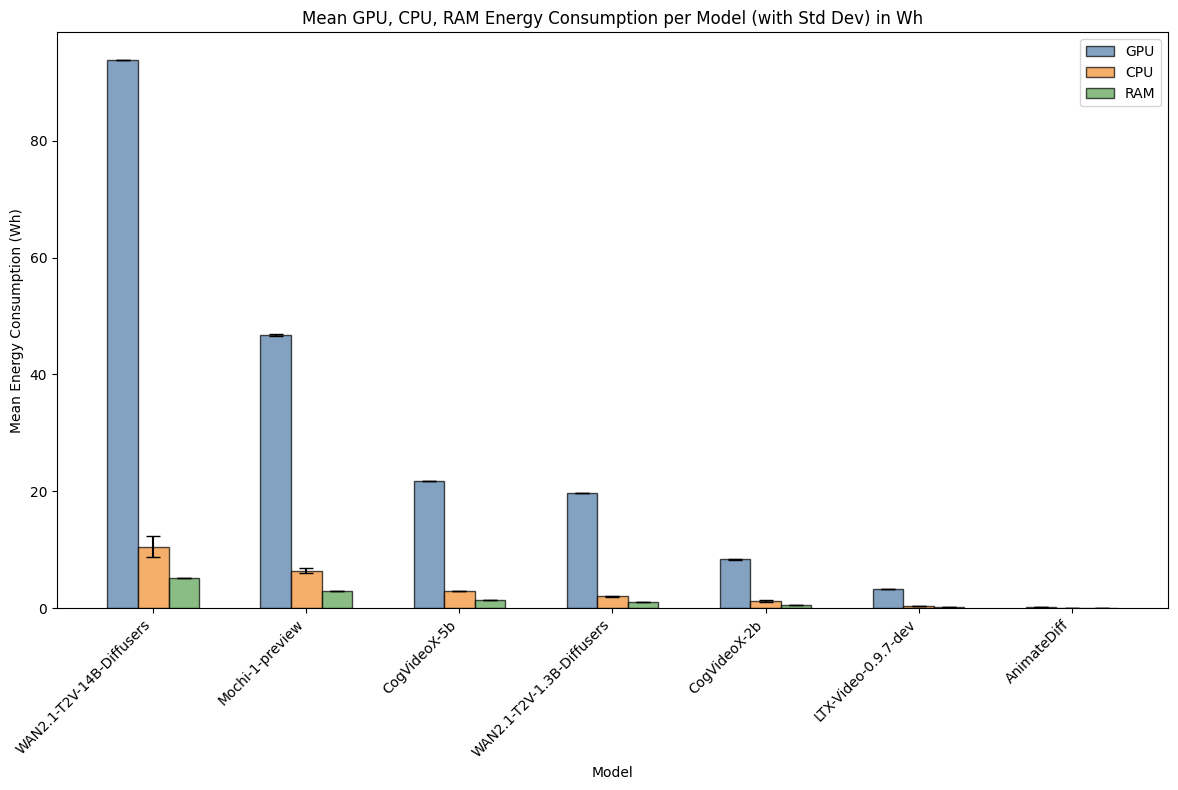

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Sélection des colonnes utiles
exp1_df_copy = exp1_df.copy()
exp1_df_copy['energy_generate_gpu'] = exp1_df_copy.apply(
    lambda row: (row['energy_generate_gpu'] + row['energy_upsample_gpu'] + row['energy_denoise_gpu']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_gpu'],
    axis=1
)
exp1_df_copy['energy_generate_cpu'] = exp1_df_copy.apply(
    lambda row: (row['energy_generate_cpu'] + row['energy_upsample_cpu'] + row['energy_denoise_cpu']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_cpu'],
    axis=1
)
exp1_df_copy['energy_generate_ram'] = exp1_df_copy.apply(
    lambda row: (row['energy_generate_ram'] + row['energy_upsample_ram'] + row['energy_denoise_ram']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_ram'],
    axis=1
)
df = exp1_df_copy[['model_name', 'energy_generate_gpu', 'energy_generate_cpu', 'energy_generate_ram']]

# Grouper : moyenne et écart-type
grouped_mean = df.groupby("model_name").mean(numeric_only=True)
grouped_std = df.groupby("model_name").std(numeric_only=True)

# Conversion en Wh (multiplication par 1000)
grouped_mean *= 1000
grouped_std *= 1000

# Fusionner pour trier
grouped = grouped_mean.join(grouped_std, lsuffix='_mean', rsuffix='_std')

# Trier par consommation GPU moyenne décroissante
grouped = grouped.sort_values(by='energy_generate_gpu_mean', ascending=False).reset_index()

# Préparer données
models = grouped["model_name"]
gpu_mean = grouped["energy_generate_gpu_mean"]
cpu_mean = grouped["energy_generate_cpu_mean"]
ram_mean = grouped["energy_generate_ram_mean"]

gpu_std = grouped["energy_generate_gpu_std"]
cpu_std = grouped["energy_generate_cpu_std"]
ram_std = grouped["energy_generate_ram_std"]

# Bar plot
bar_width = 0.2
x = range(len(models))

plt.figure(figsize=(12, 8))

plt.bar([p - bar_width for p in x], gpu_mean, yerr=gpu_std, width=bar_width,
        label="GPU", color="#4E79A7", alpha=0.7, edgecolor="black", capsize=5)
plt.bar(x, cpu_mean, yerr=cpu_std, width=bar_width,
        label="CPU", color="#F28E2B", alpha=0.7, edgecolor="black", capsize=5)
plt.bar([p + bar_width for p in x], ram_mean, yerr=ram_std, width=bar_width,
        label="RAM", color="#59A14F", alpha=0.7, edgecolor="black", capsize=5)

# Labels et légende
plt.xlabel("Model")
plt.ylabel("Mean Energy Consumption (Wh)")
plt.title("Mean GPU, CPU, RAM Energy Consumption per Model (with Std Dev) in Wh")
plt.xticks(x, models, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


In [69]:
grouped.sort_values(by='model_name')

,model_name,energy_generate_gpu_mean,energy_generate_cpu_mean,energy_generate_ram_mean,energy_generate_gpu_std,energy_generate_cpu_std,energy_generate_ram_std
6,AnimateDiff,0.111867,0.017530,0.008398,0.000886,0.003239,0.000090
4,CogVideoX-2b,8.322930,1.208137,0.545836,0.036992,0.092664,0.007790
2,CogVideoX-5b,21.706856,2.913941,1.308462,0.034711,0.062232,0.005288
5,LTX-Video-0.9.7-dev,3.186758,0.411317,0.193303,0.006074,0.023041,0.000509
1,Mochi-1-preview,46.769779,6.398529,2.893315,0.131912,0.400536,0.031207
3,WAN2.1-T2V-1.3B-Diffusers,19.733828,1.981487,1.085782,0.011740,0.050821,0.000619
0,WAN2.1-T2V-14B-Diffusers,93.828618,10.472340,5.173742,0.044354,1.780398,0.004273


In [ ]:
# sort by model, prompt
save_df = exp1_df[['model_name', 'duration_generate', 'energy_generate_gpu', 'energy_generate_cpu',
       'energy_generate_ram', 'height', 'width', 'num_frames', 'fps', 'steps', 'prompt', 'cpu_count', 'cpu_model', 'gpu_count',
       'gpu_model',  'runs', 'warmup', 'model_hf_page', 
       'guidance_scale', 'negative_prompt', 'adapter_repo',
       'adapter_ckpt', 'base_model', 'duration_upsample',
       'duration_denoise', 'energy_upsample_gpu',
       'energy_denoise_gpu', 'energy_upsample_cpu', 'energy_denoise_cpu',
       'energy_upsample_ram', 'energy_denoise_ram', 'upsample_model_name',
       'downscaled_height', 'downscaled_width', 'generate_steps',
       'denoise_steps', 'denoise_strength', 'decode_timestep',
       'image_cond_noise_scale' ]]
save_df = save_df.sort_values(by=['model_name', 'prompt']).reset_index(drop=True)
SAVE_DIR = '/fsx/jdelavande/benchlab/videos'
save_df.to_csv(os.path.join(SAVE_DIR, 'text2video_energy_benchmark.csv'), index=False)

In [ ]:
from huggingface_hub import HfApi, HfFolder
import os

api = HfApi()
repo_id = "jdelavande/benchlab-text2video-energy-benchmark"

api.create_repo(repo_id, repo_type="dataset", exist_ok=True)

api.upload_file(
    path_or_fileobj=os.path.join(SAVE_DIR, 'text2video_energy_benchmark.csv'),
    path_in_repo='text2video_energy_benchmark.csv',
    repo_id=repo_id,
    repo_type='dataset',
    token=HfFolder.get_token()
)


CommitInfo(commit_url='https://huggingface.co/datasets/jdelavande/benchlab-text2video-energy-benchmark/commit/1886822bbd226c536dcc5f174625d1547e9a652e', commit_message='Upload text2video_energy_benchmark.csv with huggingface_hub', commit_description='', oid='1886822bbd226c536dcc5f174625d1547e9a652e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/jdelavande/benchlab-text2video-energy-benchmark', endpoint='https://huggingface.co', repo_type='dataset', repo_id='jdelavande/benchlab-text2video-energy-benchmark'), pr_revision=None, pr_num=None)

## Push to hub video dataset

In [ ]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp2_'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)

exp1_df2 = pd.concat(dfs, ignore_index=True)
exp1_df2['energy_generate_gpu'] = exp1_df2.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp1_df2.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp1_df2['runs'] = 5
exp1_df2['cpu_count'] = 8
exp1_df2['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp1_df2['gpu_count'] = 1
exp1_df2['gpu_model'] = 'NVIDIA H100 80GB HBM3'




In [ ]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp3_'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)

exp1_df3 = pd.concat(dfs, ignore_index=True)
exp1_df3['energy_generate_gpu'] = exp1_df3.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp1_df3.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp1_df3['runs'] = 5
exp1_df3['cpu_count'] = 8
exp1_df3['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp1_df3['gpu_count'] = 1
exp1_df3['gpu_model'] = 'NVIDIA H100 80GB HBM3'




In [ ]:
exp1_df_all = pd.concat([exp1_df, exp1_df2, exp1_df3], ignore_index=True)

In [ ]:
video_df = exp1_df_all.copy()

In [54]:
video_df['out_video'] = video_df.apply(
    lambda row: f"/fsx/jdelavande/benchlab/videos/data/text2video_dataset/{row['out_video']}" if pd.notnull(row['out_video']) else f"/fsx/jdelavande/benchlab/videos/data/text2video_dataset/{row['out_gif']}",
    axis=1
)

In [56]:
import os
import shutil
import pandas as pd

# === CONFIG ===
# Dossier d'origine (où sont tes fichiers exp_*.mp4 ou exp_*.gif)
source_dir = "/fsx/jdelavande/benchlab/videos/data/"

# Dossier cible pour le dataset final
target_dir = "/fsx/jdelavande/benchlab/videos/data/text2video_dataset"
os.makedirs(target_dir, exist_ok=True)

# === 1) Copier les fichiers qui commencent par 'exp_' ===
copied_files = []

for filename in os.listdir(source_dir):
    if filename.startswith("exp") and (filename.endswith(".mp4") or filename.endswith(".gif")):
        src = os.path.join(source_dir, filename)
        dst = os.path.join(target_dir, filename)
        shutil.copy2(src, dst)
        copied_files.append(filename)

print(f"✅ Copié {len(copied_files)} fichiers vers {target_dir}")

✅ Copié 91 fichiers vers /fsx/jdelavande/benchlab/videos/data/text2video_dataset


In [60]:
import pandas as pd

# Sélectionne les colonnes utiles et renomme
df = video_df[['out_video', 'prompt', 'model_name']].rename(
    columns={'out_video': 'file_name', 'model_name': 'model'}
)

# Optionnel : si tes chemins sont absolus, mets juste le nom de fichier
df['file_name'] = df['file_name'].apply(lambda x: os.path.basename(x))

# Sauvegarde dans ton dossier avec les vidéos
df.to_csv('/fsx/jdelavande/benchlab/videos/data/text2video_dataset/metadata.csv', index=False)


In [61]:
from huggingface_hub import HfApi

api = HfApi()
REPO = "jdelavande/text2video-energy-benchmark-generated-videos"

api.create_repo(REPO, repo_type="dataset", exist_ok=True)

api.upload_folder(
    folder_path="/fsx/jdelavande/benchlab/videos/data/text2video_dataset",
    repo_id=REPO,
    repo_type="dataset"
)


exp2_AnimateDiff_output_prompt1_2025-06-20_11-29-11.gif: 100%|██████████| 2.50M/2.50M [00:00<00:00, 17.1MB/s]
exp2_AnimateDiff_output_prompt2_2025-06-20_11-29-43.gif: 100%|██████████| 2.10M/2.10M [00:00<00:00, 19.5MB/s]
exp2_CogVideoX-2b_output_prompt1_2025-06-20_11-27-59.mp4: 100%|██████████| 730k/730k [00:00<00:00, 6.45MB/s]
exp2_CogVideoX-2b_output_prompt2_2025-06-20_11-29-16.mp4: 100%|██████████| 505k/505k [00:00<00:00, 13.2MB/s]
exp2_CogVideoX-5b_output_prompt1_2025-06-20_11-29-11.mp4: 100%|██████████| 596k/596k [00:00<00:00, 4.61MB/s]
exp2_CogVideoX-5b_output_prompt2_2025-06-20_11-31-47.mp4: 100%|██████████| 515k/515k [00:00<00:00, 8.23MB/s]
exp2_LTX-Video-0.9.7-dev_output_prompt1_2025-06-20_11-33-53.mp4: 100%|██████████| 292k/292k [00:00<00:00, 5.96MB/s]
exp2_LTX-Video-0.9.7-dev_output_prompt2_2025-06-20_11-34-45.mp4: 100%|██████████| 216k/216k [00:00<00:00, 2.40MB/s]
exp2_Mochi-1-preview_output_prompt1_2025-06-20_11-22-00.mp4: 100%|██████████| 363k/363k [00:00<00:00, 6.87MB/s]


CommitInfo(commit_url='https://huggingface.co/datasets/jdelavande/text2video-energy-benchmark-generated-videos/commit/bc2575a96da5f0f3c43d0f18fc5c2a6e4bf49905', commit_message='Upload folder using huggingface_hub', commit_description='', oid='bc2575a96da5f0f3c43d0f18fc5c2a6e4bf49905', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/jdelavande/text2video-energy-benchmark-generated-videos', endpoint='https://huggingface.co', repo_type='dataset', repo_id='jdelavande/text2video-energy-benchmark-generated-videos'), pr_revision=None, pr_num=None)

## WAN2.1 T2V-1.3B Frames

In [2]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp7_frames'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)
exp7_df = pd.concat(dfs, ignore_index=True)
exp7_df['energy_generate_gpu'] = exp7_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp7_df.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp7_df['runs'] = 5
exp7_df['cpu_count'] = 8
exp7_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp7_df['gpu_count'] = 1
exp7_df['gpu_model'] = 'NVIDIA H100 80GB HBM3'
exp7_df.head()

,model_name,duration_generate,energy_generate_cpu,energy_generate_ram,prompt,negative_prompt,height,width,num_frames,steps,...,out_csv,fps,warmup,output_path,name_csv,energy_generate_gpu,cpu_count,cpu_model,gpu_count,gpu_model
0,frames,385.989698,0.006154,0.004077,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,78,50,...,exp7_frames_Wan2.1-T2V-1.3B-Diffusers_results_...,15,1,/fsx/jdelavande/benchlab/videos/data,exp7_frames_Wan2.1-T2V-1.3B-Diffusers_results_...,0.071075,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
1,frames,520.318363,0.008305,0.005495,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,92,50,...,exp7_frames_Wan2.1-T2V-1.3B-Diffusers_results_...,15,1,/fsx/jdelavande/benchlab/videos/data,exp7_frames_Wan2.1-T2V-1.3B-Diffusers_results_...,0.097799,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
2,frames,482.953189,0.007727,0.005101,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,90,50,...,exp7_frames_Wan2.1-T2V-1.3B-Diffusers_results_...,15,1,/fsx/jdelavande/benchlab/videos/data,exp7_frames_Wan2.1-T2V-1.3B-Diffusers_results_...,0.090701,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
3,frames,417.314658,0.006618,0.004408,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,81,50,...,exp7_frames_Wan2.1-T2V-1.3B-Diffusers_results_...,15,1,/fsx/jdelavande/benchlab/videos/data,exp7_frames_Wan2.1-T2V-1.3B-Diffusers_results_...,0.077150,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
4,frames,416.843492,0.006668,0.004403,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,83,50,...,exp7_frames_Wan2.1-T2V-1.3B-Diffusers_results_...,15,1,/fsx/jdelavande/benchlab/videos/data,exp7_frames_Wan2.1-T2V-1.3B-Diffusers_results_...,0.077307,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3


In [13]:
exp7_df[['num_frames', 'duration_generate', 'energy_generate_cpu', 'energy_generate_gpu', 'energy_generate_ram']]

,num_frames,duration_generate,energy_generate_cpu,energy_generate_gpu,energy_generate_ram
0,78,385.989698,0.006154,0.071075,0.004077
1,92,520.318363,0.008305,0.097799,0.005495
2,90,482.953189,0.007727,0.090701,0.005101
3,81,417.314658,0.006618,0.077150,0.004408
4,83,416.843492,0.006668,0.077307,0.004403
...,...,...,...,...,...
95,19,42.620712,0.000579,0.007998,0.000453
96,20,55.946272,0.000765,0.010299,0.000593
97,52,212.544616,0.002660,0.037390,0.002246
98,2,6.396755,0.000083,0.001100,0.000070


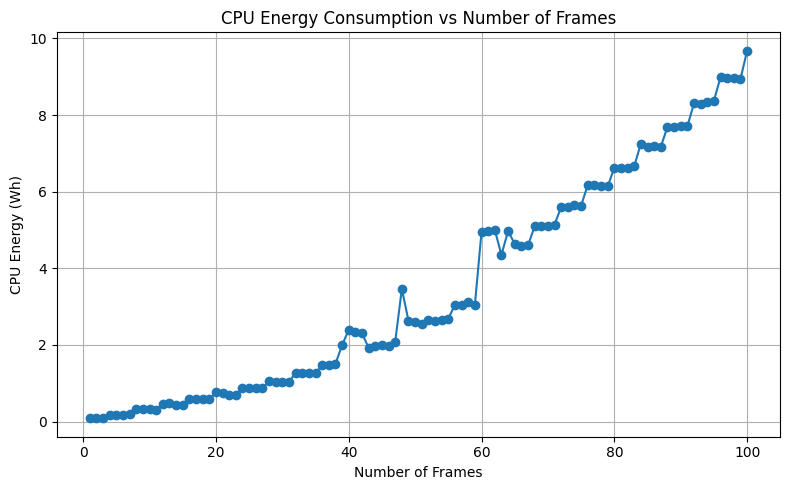

In [14]:
import matplotlib.pyplot as plt

# Sort the dataframe by number of frames for better plotting
exp7_df_sorted = exp7_df.sort_values(by='num_frames')

# Plot CPU energy vs number of frames
plt.figure(figsize=(8, 5))
plt.plot(
    exp7_df_sorted['num_frames'],
    exp7_df_sorted['energy_generate_cpu']*1000,
    marker='o', linestyle='-'
)

plt.title("CPU Energy Consumption vs Number of Frames")
plt.xlabel("Number of Frames")
plt.ylabel("CPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


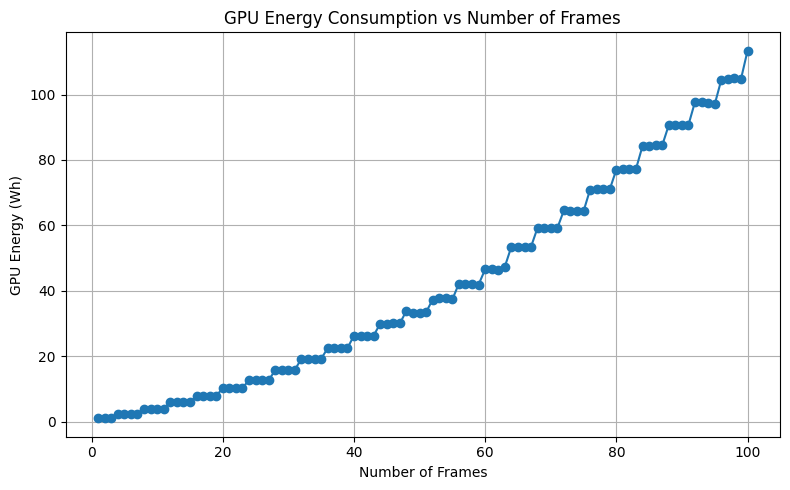

In [15]:
import matplotlib.pyplot as plt

# Sort the dataframe by number of frames for better plotting
exp7_df_sorted = exp7_df.sort_values(by='num_frames')

# Plot CPU energy vs number of frames
plt.figure(figsize=(8, 5))
plt.plot(
    exp7_df_sorted['num_frames'],
    exp7_df_sorted['energy_generate_gpu']*1000,
    marker='o', linestyle='-'
)

plt.title("GPU Energy Consumption vs Number of Frames")
plt.xlabel("Number of Frames")
plt.ylabel("GPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


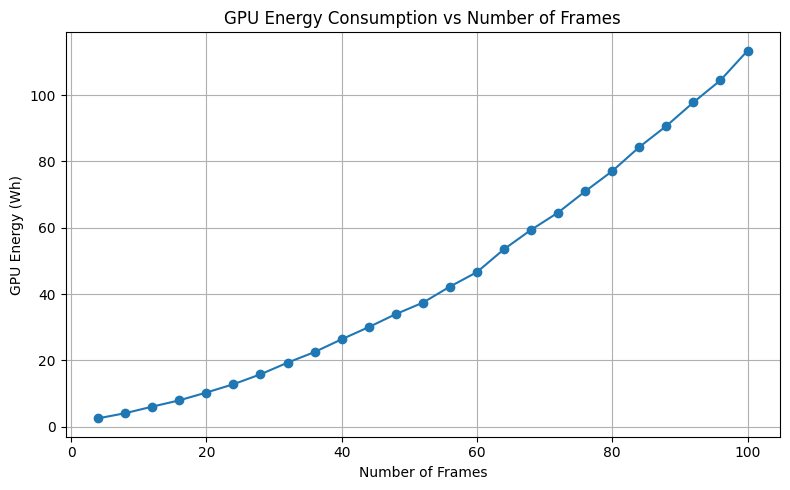

In [29]:
import matplotlib.pyplot as plt

# Filter rows where num_frames is a multiple of 4
filtered_df = exp7_df[exp7_df['num_frames'] % 4 == 0].sort_values(by='num_frames')

# Plot GPU energy vs number of frames
plt.figure(figsize=(8, 5))
plt.plot(
    filtered_df['num_frames'],
    filtered_df['energy_generate_gpu']*1000,
    marker='o', linestyle='-'
)

plt.title("GPU Energy Consumption vs Number of Frames")
plt.xlabel("Number of Frames")
plt.ylabel("GPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


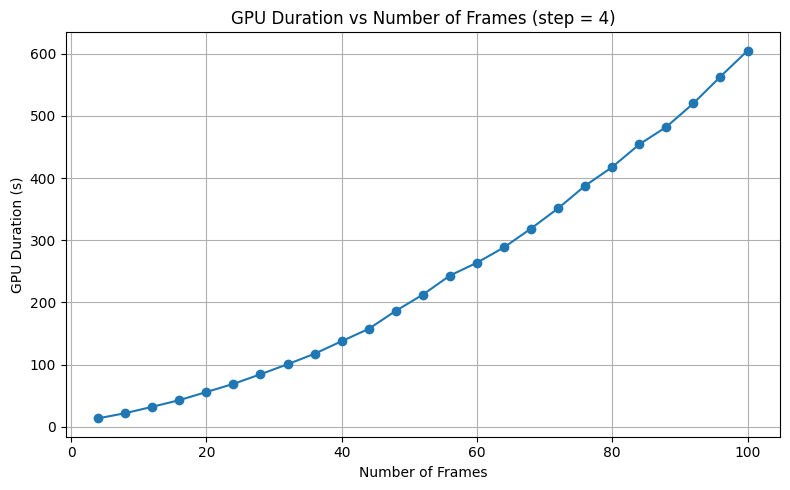

In [16]:
import matplotlib.pyplot as plt

# Filter rows where num_frames is a multiple of 4
filtered_df = exp7_df[exp7_df['num_frames'] % 4 == 0].sort_values(by='num_frames')

# Plot GPU energy vs number of frames
plt.figure(figsize=(8, 5))
plt.plot(
    filtered_df['num_frames'],
    filtered_df['duration_generate'],
    marker='o', linestyle='-'
)

plt.title("GPU Duration vs Number of Frames (step = 4)")
plt.xlabel("Number of Frames")
plt.ylabel("GPU Duration (s)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
exp7_df.describe()

,duration_generate,energy_generate_cpu,energy_generate_ram,height,width,num_frames,steps,guidance_scale,runs,fps,warmup,energy_generate_gpu,cpu_count,gpu_count
count,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0
mean,227.249913,0.003502,0.002401,720.0,1280.0,50.500000,50.0,5.0,5.0,15.0,1.0,0.041992,8.0,1.0
std,174.803827,0.002869,0.001845,0.0,0.0,29.011492,0.0,0.0,0.0,0.0,0.0,0.032477,0.0,0.0
min,6.395071,0.000083,0.000070,720.0,1280.0,1.000000,50.0,5.0,5.0,15.0,1.0,0.001100,8.0,1.0
25%,69.174835,0.000868,0.000733,720.0,1280.0,25.750000,50.0,5.0,5.0,15.0,1.0,0.012777,8.0,1.0
50%,190.697655,0.002628,0.002016,720.0,1280.0,50.500000,50.0,5.0,5.0,15.0,1.0,0.033732,8.0,1.0
75%,361.727500,0.005765,0.003821,720.0,1280.0,75.250000,50.0,5.0,5.0,15.0,1.0,0.066179,8.0,1.0
max,605.015955,0.009681,0.006389,720.0,1280.0,100.000000,50.0,5.0,5.0,15.0,1.0,0.113375,8.0,1.0


## WAN2.1 T2V-1.3B Res

In [3]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp8_res'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)
exp8_df = pd.concat(dfs, ignore_index=True)
exp8_df['energy_generate_gpu'] = exp8_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp8_df.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp8_df['runs'] = 5
exp8_df['cpu_count'] = 8
exp8_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp8_df['gpu_count'] = 1
exp8_df['gpu_model'] = 'NVIDIA H100 80GB HBM3'
exp8_df.head()

,model_name,duration_generate,energy_generate_cpu,energy_generate_ram,prompt,negative_prompt,height,width,num_frames,steps,...,out_csv,fps,warmup,output_path,name_csv,energy_generate_gpu,cpu_count,cpu_model,gpu_count,gpu_model
0,res,76.053168,0.000956,0.000805,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",432,768,81,50,...,exp8_res_Wan2.1-T2V-1.3B-Diffusers_prompt1_768...,15,1,/fsx/jdelavande/benchlab/videos/data,exp8_res_Wan2.1-T2V-1.3B-Diffusers_prompt1_768...,0.014550,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
1,res,55.934643,0.000721,0.000593,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",384,704,81,50,...,exp8_res_Wan2.1-T2V-1.3B-Diffusers_prompt1_704...,15,1,/fsx/jdelavande/benchlab/videos/data,exp8_res_Wan2.1-T2V-1.3B-Diffusers_prompt1_704...,0.010674,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
2,res,25.149334,0.000326,0.000268,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",384,384,81,50,...,exp8_res_Wan2.1-T2V-1.3B-Diffusers_prompt1_384...,15,1,/fsx/jdelavande/benchlab/videos/data,exp8_res_Wan2.1-T2V-1.3B-Diffusers_prompt1_384...,0.004718,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
3,res,225.638278,0.004332,0.002384,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",608,1088,81,50,...,exp8_res_Wan2.1-T2V-1.3B-Diffusers_prompt1_108...,15,1,/fsx/jdelavande/benchlab/videos/data,exp8_res_Wan2.1-T2V-1.3B-Diffusers_prompt1_108...,0.043061,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
4,res,18.531926,0.000242,0.000198,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",256,448,81,50,...,exp8_res_Wan2.1-T2V-1.3B-Diffusers_prompt1_448...,15,1,/fsx/jdelavande/benchlab/videos/data,exp8_res_Wan2.1-T2V-1.3B-Diffusers_prompt1_448...,0.003380,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3


In [19]:
exp8_df.columns

Index(['model_name', 'duration_generate', 'energy_generate_cpu',
       'energy_generate_ram', 'prompt', 'negative_prompt', 'height', 'width',
       'num_frames', 'steps', 'guidance_scale', 'runs', 'out_video', 'out_csv',
       'fps', 'warmup', 'output_path', 'name_csv', 'energy_generate_gpu',
       'cpu_count', 'cpu_model', 'gpu_count', 'gpu_model'],
      dtype='object')

In [20]:
exp8_df[['width', 'height', 'duration_generate', 'energy_generate_cpu', 'energy_generate_gpu', 'energy_generate_ram']]

,width,height,duration_generate,energy_generate_cpu,energy_generate_gpu,energy_generate_ram
0,768,432,76.053168,0.000956,0.014550,0.000805
1,704,384,55.934643,0.000721,0.010674,0.000593
2,384,384,25.149334,0.000326,0.004718,0.000268
3,1088,608,225.638278,0.004332,0.043061,0.002384
4,448,256,18.531926,0.000242,0.003380,0.000198
5,256,256,9.857111,0.000133,0.001646,0.000107
6,832,480,100.248483,0.001258,0.019198,0.001061
7,576,320,33.336573,0.000437,0.006333,0.000355
8,320,240,11.932699,0.000159,0.002045,0.000129
9,512,512,53.908905,0.000705,0.010288,0.000572


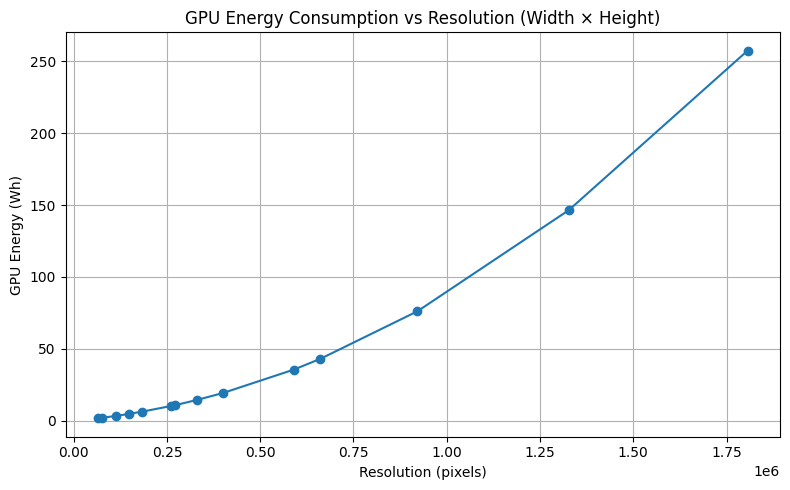

In [21]:
import matplotlib.pyplot as plt

# Create a new column for resolution (width × height)
exp8_df['resolution'] = exp8_df['width'] * exp8_df['height']

# Sort by resolution for better plotting
exp8_df_sorted = exp8_df.sort_values(by='resolution')

# Plot GPU energy vs resolution
plt.figure(figsize=(8, 5))
plt.plot(
    exp8_df_sorted['resolution'],
    exp8_df_sorted['energy_generate_gpu']*1000,
    marker='o', linestyle='-'
)

plt.title("GPU Energy Consumption vs Resolution (Width × Height)")
plt.xlabel("Resolution (pixels)")
plt.ylabel("GPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


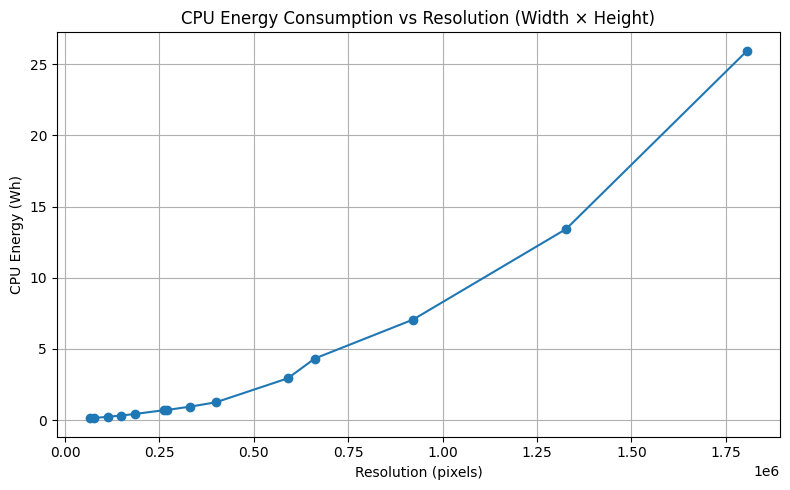

In [ ]:
import matplotlib.pyplot as plt

# Create a new column for resolution (width × height)
exp8_df['resolution'] = exp8_df['width'] * exp8_df['height']

# Sort by resolution for better plotting
exp8_df_sorted = exp8_df.sort_values(by='resolution')

# Plot GPU energy vs resolution
plt.figure(figsize=(8, 5))
plt.plot(
    exp8_df_sorted['resolution'],
    exp8_df_sorted['energy_generate_cpu']*1000,
    marker='o', linestyle='-'
)

plt.title("CPU Energy Consumption vs Resolution (Width × Height)")
plt.xlabel("Resolution (pixels)")
plt.ylabel("CPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


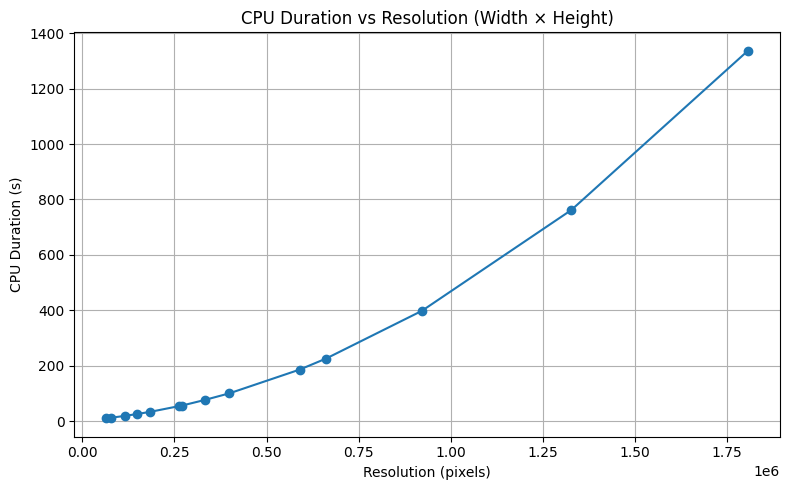

: 

In [ ]:
import matplotlib.pyplot as plt

# Create a new column for resolution (width × height)
exp8_df['resolution'] = exp8_df['width'] * exp8_df['height']

# Sort by resolution for better plotting
exp8_df_sorted = exp8_df.sort_values(by='resolution')

# Plot GPU energy vs resolution
plt.figure(figsize=(8, 5))
plt.plot(
    exp8_df_sorted['resolution'],
    exp8_df_sorted['duration_generate'],
    marker='o', linestyle='-'
)

plt.title("Generation Duration vs Resolution (Width × Height)")
plt.xlabel("Resolution (pixels)")
plt.ylabel("Generation Duration (s)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
exp8_df_sorted.describe()

,duration_generate,energy_generate_cpu,energy_generate_ram,height,width,num_frames,steps,guidance_scale,runs,fps,warmup,energy_generate_gpu,cpu_count,gpu_count,resolution
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.0,14.0,14.0,14.000000,14.0,14.0,1.400000e+01
mean,235.194965,0.004188,0.002485,502.857143,822.857143,81.0,50.0,5.0,5.0,15.0,1.0,0.045093,8.0,1.0,5.113417e+05
std,378.309805,0.007277,0.003993,233.277272,468.191752,0.0,0.0,0.0,0.0,0.0,0.0,0.072846,0.0,0.0,5.180381e+05
min,9.857111,0.000133,0.000107,240.000000,256.000000,81.0,50.0,5.0,5.0,15.0,1.0,0.001646,8.0,1.0,6.553600e+04
25%,27.196144,0.000354,0.000290,336.000000,464.000000,81.0,50.0,5.0,5.0,15.0,1.0,0.005121,8.0,1.0,1.566720e+05
50%,65.993905,0.000838,0.000699,456.000000,736.000000,81.0,50.0,5.0,5.0,15.0,1.0,0.012612,8.0,1.0,3.010560e+05
75%,215.676055,0.003984,0.002279,600.000000,1072.000000,81.0,50.0,5.0,5.0,15.0,1.0,0.041176,8.0,1.0,6.435840e+05
max,1336.692796,0.025935,0.014112,1008.000000,1792.000000,81.0,50.0,5.0,5.0,15.0,1.0,0.257332,8.0,1.0,1.806336e+06


## WAN2.1 T2V-1.3B Steps

In [4]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp10_steps'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)
exp9_df = pd.concat(dfs, ignore_index=True)
exp9_df['energy_generate_gpu'] = exp9_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
exp9_df.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
exp9_df['runs'] = 5
exp9_df['cpu_count'] = 8
exp9_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
exp9_df['gpu_count'] = 1
exp9_df['gpu_model'] = 'NVIDIA H100 80GB HBM3'
exp9_df.head()

,model_name,duration_generate,energy_generate_cpu,energy_generate_ram,prompt,negative_prompt,height,width,num_frames,steps,...,out_csv,fps,warmup,output_path,name_csv,energy_generate_gpu,cpu_count,cpu_model,gpu_count,gpu_model
0,steps,574.921832,0.009498,0.006070,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,50,160,...,exp10_steps_Wan2.1-T2V-1.3B-Diffusers_results_...,15,1,/fsx/jdelavande/benchlab/videos/data,exp10_steps_Wan2.1-T2V-1.3B-Diffusers_results_...,0.110134,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
1,steps,553.101145,0.010609,0.005840,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,50,154,...,exp10_steps_Wan2.1-T2V-1.3B-Diffusers_results_...,15,1,/fsx/jdelavande/benchlab/videos/data,exp10_steps_Wan2.1-T2V-1.3B-Diffusers_results_...,0.105941,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
2,steps,686.118696,0.015332,0.007244,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,50,191,...,exp10_steps_Wan2.1-T2V-1.3B-Diffusers_results_...,15,1,/fsx/jdelavande/benchlab/videos/data,exp10_steps_Wan2.1-T2V-1.3B-Diffusers_results_...,0.131420,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
3,steps,707.254777,0.014473,0.007467,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,50,197,...,exp10_steps_Wan2.1-T2V-1.3B-Diffusers_results_...,15,1,/fsx/jdelavande/benchlab/videos/data,exp10_steps_Wan2.1-T2V-1.3B-Diffusers_results_...,0.135487,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3
4,steps,611.108748,0.011708,0.006452,A cat and a dog baking a cake together in a ki...,"Bright tones, overexposed, static, blurred det...",720,1280,50,171,...,exp10_steps_Wan2.1-T2V-1.3B-Diffusers_results_...,15,1,/fsx/jdelavande/benchlab/videos/data,exp10_steps_Wan2.1-T2V-1.3B-Diffusers_results_...,0.117125,8,AMD EPYC 7R13 Processor,1,NVIDIA H100 80GB HBM3


In [13]:
exp9_df[['steps', 'duration_generate', 'energy_generate_cpu', 'energy_generate_gpu', 'energy_generate_ram']]

,steps,duration_generate,energy_generate_cpu,energy_generate_gpu,energy_generate_ram
0,160,574.921832,0.009498,0.110134,0.006070
1,154,553.101145,0.010609,0.105941,0.005840
2,171,611.108748,0.011708,0.117125,0.006452
3,3,15.438905,0.000275,0.002926,0.000165
4,50,183.657414,0.003227,0.035133,0.001940
...,...,...,...,...,...
185,150,538.933063,0.010338,0.103241,0.005691
186,158,567.859900,0.009017,0.108770,0.005996
187,138,496.358821,0.009547,0.095076,0.005241
188,113,407.600940,0.007192,0.078072,0.004304


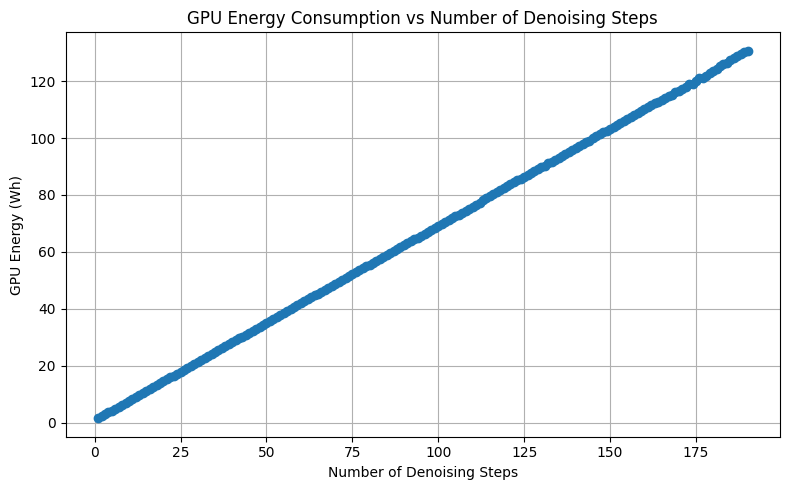

In [14]:
import matplotlib.pyplot as plt

# Sort the DataFrame by number of steps
exp9_df_sorted = exp9_df.sort_values(by='steps')

# Plot GPU energy vs number of denoising steps
plt.figure(figsize=(8, 5))
plt.plot(
    exp9_df_sorted['steps'],
    exp9_df_sorted['energy_generate_gpu']*1000,
    marker='o', linestyle='-'
)

plt.title("GPU Energy Consumption vs Number of Denoising Steps")
plt.xlabel("Number of Denoising Steps")
plt.ylabel("GPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


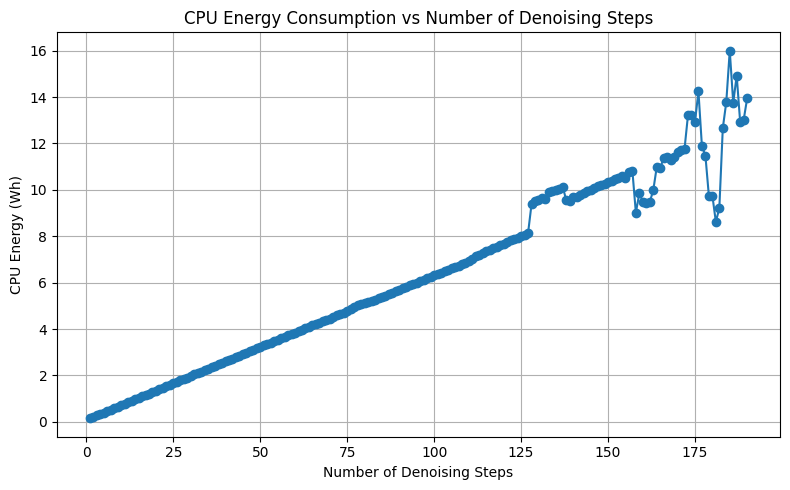

In [15]:
import matplotlib.pyplot as plt

# Sort the DataFrame by number of steps
exp9_df_sorted = exp9_df.sort_values(by='steps')

# Plot GPU energy vs number of denoising steps
plt.figure(figsize=(8, 5))
plt.plot(
    exp9_df_sorted['steps'],
    exp9_df_sorted['energy_generate_cpu']*1000,
    marker='o', linestyle='-'
)

plt.title("CPU Energy Consumption vs Number of Denoising Steps")
plt.xlabel("Number of Denoising Steps")
plt.ylabel("CPU Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()


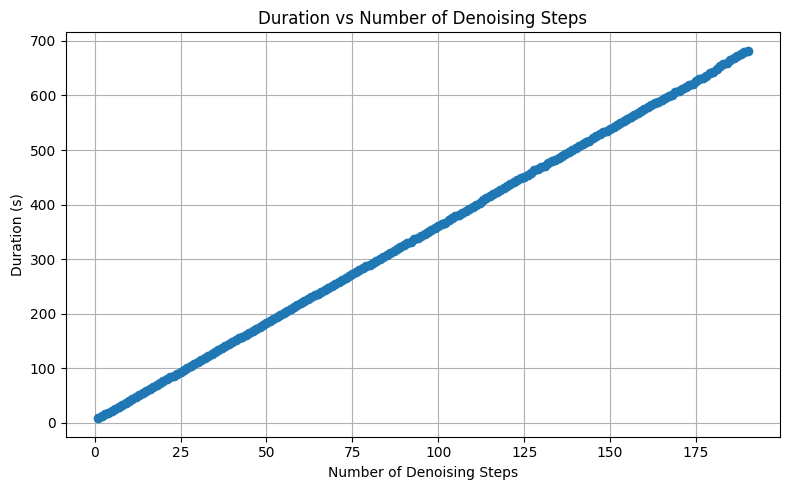

In [16]:
import matplotlib.pyplot as plt

# Sort the DataFrame by number of steps
exp9_df_sorted = exp9_df.sort_values(by='steps')

# Plot GPU energy vs number of denoising steps
plt.figure(figsize=(8, 5))
plt.plot(
    exp9_df_sorted['steps'],
    exp9_df_sorted['duration_generate'],
    marker='o', linestyle='-'
)

plt.title("Duration vs Number of Denoising Steps")
plt.xlabel("Number of Denoising Steps")
plt.ylabel("Duration (s)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Theorical calculations

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt

# =========================
# ======= PARAMS ==========
# =========================
# Base video/latent settings
T0 = 81             # frames (total, sans compter le "1 +" séparément ici)
H0, W0 = 480, 832   # base resolution
N = 32              # number of DiT layers
S0 = 50             # base denoising steps
m_text = 512      # longueur de contexte texte WanModel par défaut
d = 2048          # dim (WanModel default)

# DiT / tokenization params
f_mlp = 4           # MLP expansion (≈4)
vae_stride_t = 4    # VAE temporal stride
vae_stride_s = 8    # VAE spatial stride (H et W)
patch_h, patch_w = 2, 2  # patch spatial appliqué aux latents avant DiT (1 si pas de patch)
g = 2              # passes in th DiT cond and uncond

# timestep embedding MLP
d_tau = 256         # dim de l'embedding des timesteps

# VAE architecture defaults (Wan-VAE) for exact FLOPs
Z_DIM = 16   # latent channels
BASE = 96    # base width (dim)
# temperal_downsample encodeur: [False, True, True] => stride t=4 total, s=8 total (déjà pris en compte)
# temperal_upsample décodeur:  [True, True, False]

# Option: si tu veux forcer une version agrégée (K*T*H*W), mets USE_EXACT_VAE=False
USE_EXACT_VAE = True
# Valeurs placeholder (non utilisées si USE_EXACT_VAE=True)
K_enc = 2.0e9
K_dec = 2.0e9

# Hardware / mapping
theta_peak = 989e12  # FLOPs/s (H100 FP8 peak approx)
mu_eff = 0.46          # effective utilization
P_max = 700.0          # Watts
latency_overhead = 0.0
energy_overhead = 0.0

# Ranges for plots
S_values = np.arange(1, 200, 4)          # vary S
scale_values = np.linspace(0.5, 2.0, 40) # vary (H,W) by a scale factor
T_values = np.arange(4, 100, 2)          # vary T


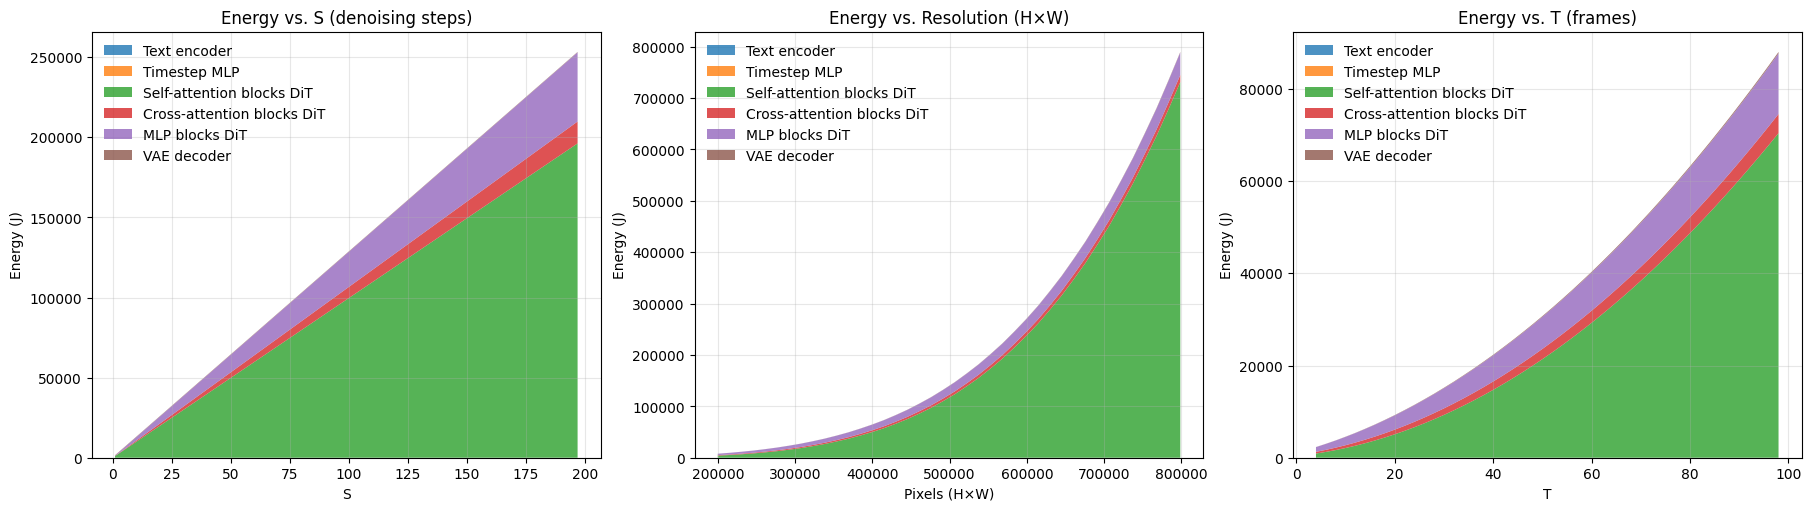

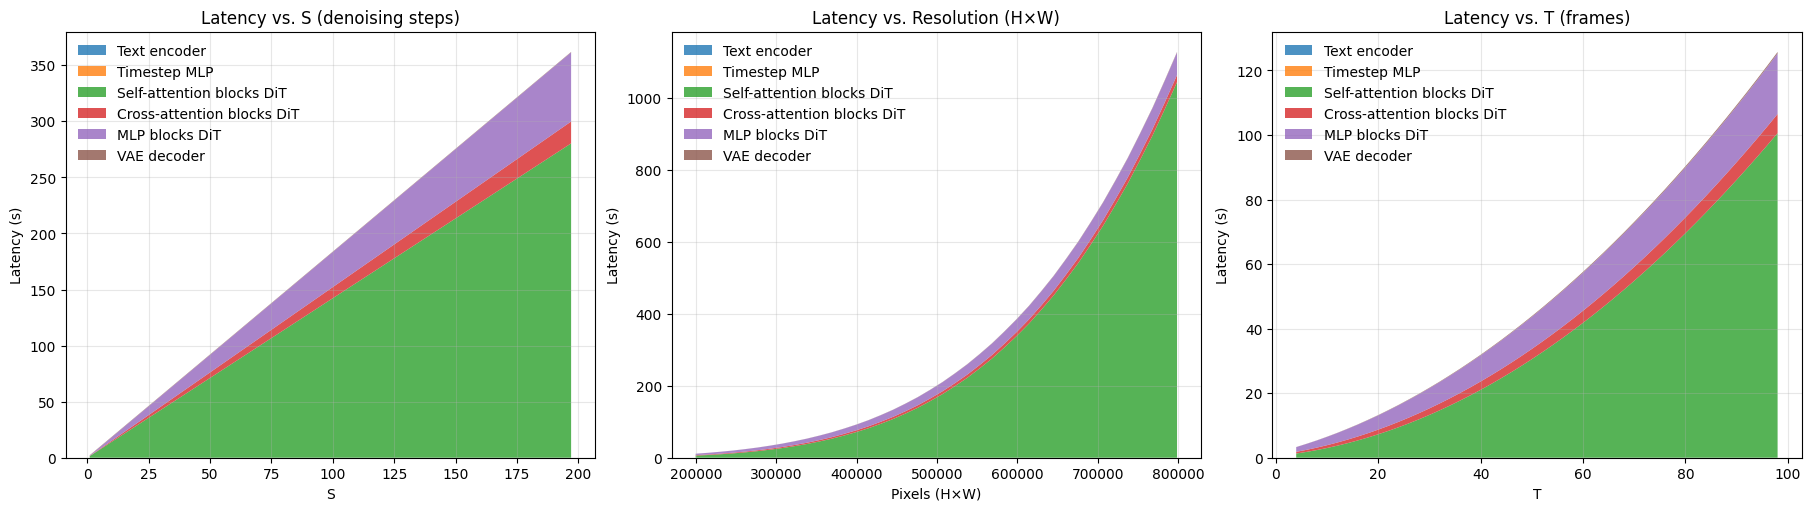

In [14]:
# =========================
# ======= HELPERS =========
# =========================
def conv3d_flops(cin, cout, kt, kh, kw, T, H, W):
    # HPC convention: 2 FLOPs per MAC
    return 2 * kt * kh * kw * cin * cout * T * H * W

def conv2d_flops(cin, cout, kh, kw, T, H, W):
    return 2 * kh * kw * cin * cout * T * H * W

def attn2d_middle_flops(C, T, H, W):
    """
    Attention 2D par time-slice (1 tête) utilisée dans les "middle blocks".
    Coûts:
      to_qkv: 2*C*(3C)*L
      proj  : 2*C*C*L
      matmul: 4*L^2*C  (QK^T + AV)
    """
    L = H * W
    toqkv = 2 * C * (3*C) * L
    proj  = 2 * C * C * L
    mat   = 4 * (L * L) * C
    return T * (toqkv + proj + mat)

# =========================
# === VAE exact FLOPs =====
# =========================
def wan_vae_flops_exact(T0, H0, W0, z=Z_DIM, d0=BASE):
    """
    FLOPs exacts encodeur+décodeur Wan-VAE (HPC).
    On suit l'implémentation: conv3d causales, down2d / down3d, middle RB-Attn-RB,
    puis décoder symétrique avec upsample3d/2d. Tous les ceil() sont pris en compte.
    """
    # ---------- Encodeur: tailles ----------
    T0 = int(T0); H0 = int(H0); W0 = int(W0)
    # Après down2d (i=0)
    T1, H1, W1 = T0, math.ceil(H0/2), math.ceil(W0/2)
    # Après down3d (i=1)
    T2, H2, W2 = math.ceil(T1/2), math.ceil(H1/2), math.ceil(W1/2)
    # Après down3d (i=2)
    T3, H3, W3 = math.ceil(T2/2), math.ceil(H2/2), math.ceil(W2/2)

    Fenc = 0
    # E0: conv d'entrée 3->96 @ (T0,H0,W0)
    Fenc += conv3d_flops(3, d0, 3,3,3, T0,H0,W0)

    # E1: deux RB 96->96 @ (T0,H0,W0)
    Fenc += 4 * conv3d_flops(d0, d0, 3,3,3, T0,H0,W0)
    # down2d 96->96 @ (T0,H1,W1)
    Fenc += conv2d_flops(d0, d0, 3,3, T0, H1, W1)

    # E2: RB(96->192 + shortcut) + RB(192->192 x2) @ (T1,H1,W1)
    Fenc += conv3d_flops(96,192,3,3,3, T1,H1,W1) \
          + conv3d_flops(192,192,3,3,3, T1,H1,W1) \
          + conv3d_flops(96,192,1,1,1, T1,H1,W1)
    Fenc += 2 * conv3d_flops(192,192,3,3,3, T1,H1,W1)
    # down3d: 2d @ (T1,H2,W2) + time conv (3,1,1) @ (T2,H2,W2)
    Fenc += conv2d_flops(192,192,3,3, T1, H2, W2)
    Fenc += conv3d_flops(192,192,3,1,1, T2, H2, W2)

    # E3: RB(192->384 + shortcut) + RB(384->384 x2) @ (T2,H2,W2)
    Fenc += conv3d_flops(192,384,3,3,3, T2,H2,W2) \
          + conv3d_flops(384,384,3,3,3, T2,H2,W2) \
          + conv3d_flops(192,384,1,1,1, T2,H2,W2)
    Fenc += 2 * conv3d_flops(384,384,3,3,3, T2,H2,W2)
    # down3d
    Fenc += conv2d_flops(384,384,3,3, T2, H3, W3)
    Fenc += conv3d_flops(384,384,3,1,1, T3, H3, W3)

    # E4: deux RB 384->384 @ (T3,H3,W3)
    Fenc += 4 * conv3d_flops(384,384,3,3,3, T3,H3,W3)

    # E5: Middle RB-Attn-RB @ (T3,H3,W3)
    Fenc += 4 * conv3d_flops(384,384,3,3,3, T3,H3,W3)  # 2 RBs
    Fenc += attn2d_middle_flops(384, T3, H3, W3)

    # E6: Head 384->2z @ (T3,H3,W3)
    Fenc += conv3d_flops(384, 2*z, 3,3,3, T3,H3,W3)

    # ---------- Décodeur ----------
    Fdec = 0
    # D0: conv1 z->384 @ (T3,H3,W3)
    Fdec += conv3d_flops(z,384,3,3,3, T3,H3,W3)
    # middle
    Fdec += 4 * conv3d_flops(384,384,3,3,3, T3,H3,W3)
    Fdec += attn2d_middle_flops(384, T3, H3, W3)

    # D1 (upsample3d) @ (T3,H3,W3): RBx3 (384->384)
    Fdec += 3 * 2 * conv3d_flops(384,384,3,3,3, T3,H3,W3)
    # time conv 384->768, puis interleave -> T'=2*T3
    Fdec += conv3d_flops(384,768,3,1,1, 2*T3, H3, W3)
    # spatial up + conv2d 384->192 @ (2H3,2W3), T=2*T3
    Fdec += conv2d_flops(384,192,3,3, 2*T3, 2*H3, 2*W3)

    # D2 (upsample3d) @ (2T3,2H3,2W3): RB1 (192->384 + sc) + RBx2 (384->384)
    T35, H2, W2 = 2*T3, 2*H3, 2*W3
    Fdec += conv3d_flops(192,384,3,3,3, T35,H2,W2) \
          + conv3d_flops(384,384,3,3,3, T35,H2,W2) \
          + conv3d_flops(192,384,1,1,1, T35,H2,W2)
    Fdec += 2 * conv3d_flops(384,384,3,3,3, T35,H2,W2)
    # time conv 384->768 @ T=4*T3
    Fdec += conv3d_flops(384,768,3,1,1, 4*T3, H2, W2)
    # spatial up + conv2d 384->192 @ (4H3,4W3), T=4*T3
    Fdec += conv2d_flops(384,192,3,3, 4*T3, 4*H3, 4*W3)

    # D3 (upsample2d) @ (4T3,4H3,4W3): RBx3 (192->192)
    T2, H1, W1 = 4*T3, 4*H3, 4*W3
    Fdec += 3 * 2 * conv3d_flops(192,192,3,3,3, T2,H1,W1)
    # spatial up + conv2d 192->96 @ (8H3,8W3), T=4*T3
    Fdec += conv2d_flops(192,96,3,3, T2, 8*H3, 8*W3)

    # D4: Head 96->3 @ (T0,H0,W0) (normalement T0=8T3, H0=8H3, W0=8W3)
    Fdec += conv3d_flops(96,3,3,3,3, T2, 8*H3, 8*W3)

    return Fenc, Fdec

def flops_vae_enc(T, H, W):
    if USE_EXACT_VAE:
        Fenc, _ = wan_vae_flops_exact(T, H, W, z=Z_DIM, d0=BASE)
        return Fenc
    # agrégé optionnel
    return K_enc * T * H * W

def flops_vae_dec(T, H, W):
    if USE_EXACT_VAE:
        _, Fdec = wan_vae_flops_exact(T, H, W, z=Z_DIM, d0=BASE)
        return Fdec
    return K_dec * T * H * W

# =========================
# === Text encoder FLOPs ==
# =========================
def flops_t5_layer(m_text: int, d_text: int, f_ff: int = 4):
    """
    One T5 encoder layer, 2 FLOPs/MAC convention.
    Self-attn: 8 m d^2 + 4 m^2 d
    FFN     : 4 f m d^2
    """
    F_attn = 8.0 * m_text * (d_text ** 2) + 4.0 * (m_text ** 2) * d_text
    F_ffn  = 4.0 * f_ff * m_text * (d_text ** 2)
    return F_attn + F_ffn

def flops_text_encoder_total(m_text: int,
                             d_text: int,
                             L_text: int,
                             f_ff: int = 4,
                             passes: int = 2):
    """
    Total T5 encoder FLOPs for all layers and (optionally) CFG (cond+uncond) passes.
    """
    return passes * L_text * flops_t5_layer(m_text, d_text, f_ff)

# =========================
# == Timestep MLP FLOPs ===
# =========================
def flops_timestep_mlp_per_layer(d_model: int,
                                 d_tau: int = d_tau):
    """
    Cost to map a timestep embedding to per-block conditioning.
    """
    return 2 * d_tau * d_model + 14 * d_model**2


# =========================
# ======= DiT FLOPs =======
# =========================
def latent_tokens(T, H, W,
                  vae_t=vae_stride_t, vae_s=vae_stride_s,
                  p_h=patch_h, p_w=patch_w):
    """
    ℓ = (1 + T/vae_t) * (H/(vae_s*p_h)) * (W/(vae_s*p_w))
    On garde en float pour des courbes lisses même si H,W ne sont pas multiples.
    """
    return (1.0 + T/float(vae_t)) * (H/(vae_s*p_h)) * (W/(vae_s*p_w))

def flops_dit_per_layer(T, H, W, d, f_mlp=4, m_text=512,
                        vae_t=4, vae_s=8, p_h=2, p_w=2):
    """
    HPC (2 FLOPs/MAC)
    Self-Attn  : 8 ℓ d^2 + 4 ℓ^2 d
    Cross step : 4 ℓ d^2 + 4 m d^2 + 4 ℓ m d   # K,V recomptés à chaque étape (pas de KV cache)
    MLP        : 4 f ℓ d^2
    """
    ell = (1.0 + T/float(vae_t)) * (H/(vae_s*p_h)) * (W/(vae_s*p_w))
    F_self = 8.0 * ell * d**2 + 4.0 * (ell**2) * d
    F_cross_step = 4.0 * ell * d**2 + 4.0 * m_text * d**2 + 4.0 * ell * m_text * d
    F_mlp = 4.0 * f_mlp * ell * d**2
    return F_self, F_cross_step, F_mlp

# =========================
# === Total FLOPs breakdown ==
# =========================

def flops_total_breakdown(T, H, W, S, N, d, f_mlp=4, m_text=512, enc=False,
                          include_text=True,
                          d_text=1024, L_text=24, f_text=4, text_passes=2,
                          include_timestep=True,
                          temb_layers=2, temb_hidden=2,
                          g=g):
    """
    Returns a dict with per-part FLOPs + total.
    New parts:
      - 'text' : text encoder (e.g., T5), typically done once (cond+uncond)
      - 'temb' : timestep MLP per diffusion step per DiT layer
    """
    # --- VAE ---
    F_enc = flops_vae_enc(T, H, W) if enc else 0.0
    F_dec = flops_vae_dec(T, H, W)

    # --- DiT per-layer costs (self/cross/mlp) ---
    F_self_l, F_cross_step_l, F_mlp_l = flops_dit_per_layer(T, H, W, d, f_mlp, m_text)
    F_self  = S * N * g * F_self_l
    F_cross = S * N * g * F_cross_step_l
    F_mlp   = S * N * g * F_mlp_l

    # --- Text encoder (once; usually 2 passes for CFG) ---
    F_text = 0.0
    if include_text:
        F_text = flops_text_encoder_total(m_text=m_text,
                                          d_text=d_text,
                                          L_text=L_text,
                                          f_ff=f_text,
                                          passes=text_passes)

    # --- Timestep MLP (per step per layer) ---
    F_temb = 0.0
    if include_timestep:
        F_temb_per_layer = flops_timestep_mlp_per_layer(d_model=d,
                                                        d_tau=d_tau)
        F_temb = S * N * F_temb_per_layer

    F_total = F_enc + F_self + F_cross + F_mlp + F_dec + F_text + F_temb

    res = {"enc": F_enc} if enc else {}
    res = {
        **res,
        "text": F_text if include_text else 0.0,
        "temb": F_temb if include_timestep else 0.0,
        "self": F_self,
        "cross": F_cross,
        "mlp": F_mlp,
        "dec": F_dec,
        "total": F_total,
    }
    return res



# =========================
# === Latency & Energy ====
# =========================
def latency_energy_from_flops(F_total, theta_peak, mu_eff, P_max, lat_over=0.0, en_over=0.0):
    T_s = F_total / (mu_eff * theta_peak) + lat_over
    E_j = P_max * T_s + en_over
    return T_s, E_j

# =========================
# ====== CURVES =========== 
# =========================
def build_curves_vary_S(S_values, T, H, W, enc=False,
                        include_text=True, include_timestep=True,
                        d_text=1024, L_text=24, f_text=4, text_passes=2,
                        temb_layers=2, temb_hidden=None):
    parts = []
    if enc: parts.append("enc")
    if include_text: parts.append("text")
    if include_timestep: parts.append("temb")
    parts += ["self", "cross", "mlp", "dec"]

    E_comp, T_comp = {p: [] for p in parts}, {p: [] for p in parts}
    E_total, T_total = [], []
    for S in S_values:
        fb = flops_total_breakdown(
            T, H, W, S, N, d, f_mlp, m_text, enc=enc,
            include_text=include_text, d_text=d_text, L_text=L_text,
            f_text=f_text, text_passes=text_passes,
            include_timestep=include_timestep,
            temb_layers=temb_layers, temb_hidden=temb_hidden
        )
        for p in parts:
            T_s, E_j = latency_energy_from_flops(
                fb[p], theta_peak, mu_eff, P_max, latency_overhead, energy_overhead
            )
            T_comp[p].append(T_s); E_comp[p].append(E_j)
        T_s_tot, E_j_tot = latency_energy_from_flops(
            fb["total"], theta_peak, mu_eff, P_max, latency_overhead, energy_overhead
        )
        T_total.append(T_s_tot); E_total.append(E_j_tot)
    return np.array(T_total), np.array(E_total), {p: np.array(T_comp[p]) for p in parts}, {p: np.array(E_comp[p]) for p in parts}

def build_curves_vary_scale(scale_values, T, H0, W0, S, enc=False,
                             include_text=True, include_timestep=True,
                             d_text=1024, L_text=24, f_text=4, text_passes=2,
                             temb_layers=2, temb_hidden=None):
    parts = []
    if enc: parts.append("enc")
    if include_text: parts.append("text")
    if include_timestep: parts.append("temb")
    parts += ["self", "cross", "mlp", "dec"]

    E_comp, T_comp = {p: [] for p in parts}, {p: [] for p in parts}
    E_total, T_total = [], []
    for s in scale_values:
        H = int(round(H0 * s))
        W = int(round(W0 * s))
        fb = flops_total_breakdown(T, H, W, S, N, d, f_mlp, m_text)
        for p in parts:
            T_s, E_j = latency_energy_from_flops(fb[p], theta_peak, mu_eff, P_max,
                                                 latency_overhead, energy_overhead)
            T_comp[p].append(T_s); E_comp[p].append(E_j)
        T_s_tot, E_j_tot = latency_energy_from_flops(fb["total"], theta_peak, mu_eff, P_max,
                                                     latency_overhead, energy_overhead)
        T_total.append(T_s_tot); E_total.append(E_j_tot)
    return np.array(T_total), np.array(E_total), {p: np.array(T_comp[p]) for p in parts}, {p: np.array(E_comp[p]) for p in parts}

def build_curves_vary_T(T_values, H, W, S, enc=False,
                        include_text=True, include_timestep=True,
                        d_text=1024, L_text=24, f_text=4, text_passes=2,
                        temb_layers=2, temb_hidden=None):
    """
    Vary T (number of frames) while keeping H,W,S fixed.
    """
    parts = []
    if enc: parts.append("enc")
    if include_text: parts.append("text")
    if include_timestep: parts.append("temb")
    parts += ["self", "cross", "mlp", "dec"]

    E_comp, T_comp = {p: [] for p in parts}, {p: [] for p in parts}
    E_total, T_total = [], []
    for T in T_values:
        fb = flops_total_breakdown(T, H, W, S, N, d, f_mlp, m_text)
        for p in parts:
            T_s, E_j = latency_energy_from_flops(fb[p], theta_peak, mu_eff, P_max,
                                                 latency_overhead, energy_overhead)
            T_comp[p].append(T_s); E_comp[p].append(E_j)
        T_s_tot, E_j_tot = latency_energy_from_flops(fb["total"], theta_peak, mu_eff, P_max,
                                                     latency_overhead, energy_overhead)
        T_total.append(T_s_tot); E_total.append(E_j_tot)
    return np.array(T_total), np.array(E_total), {p: np.array(T_comp[p]) for p in parts}, {p: np.array(E_comp[p]) for p in parts}

# =========================
# ======= PLOTS ===========
# =========================
def stacked_area(ax, x, comp_dict, title, xlabel, ylabel, enc=False,
                 include_text=True, include_timestep=True):
    order = []
    if enc: order.append("enc")
    if include_text: order.append("text")
    if include_timestep: order.append("temb")
    order += ["self", "cross", "mlp", "dec"]
    labels = {}
    if enc: labels["enc"] = "VAE encoder"
    if include_text: labels["text"] = "Text encoder"
    if include_timestep: labels["temb"] = "Timestep MLP"
    labels = { **labels,
        "self": "Self-attention blocks DiT",
        "cross": "Cross-attention blocks DiT",
        "mlp": "MLP blocks DiT",
        "dec": "VAE decoder",
    }
    y = [comp_dict[k] for k in order]
    ax.stackplot(x, y, labels=[labels[k] for k in order], alpha=0.8)
    ax.set_title(title); ax.set_xlabel(xlabel); ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3); ax.legend(loc="upper left", frameon=False)

# ---- Build data
T_tot_S, E_tot_S, T_comp_S, E_comp_S = build_curves_vary_S(S_values, T0, H0, W0)
T_tot_sc, E_tot_sc, T_comp_sc, E_comp_sc = build_curves_vary_scale(scale_values, T0, H0, W0, S0)
T_tot_T, E_tot_T, T_comp_T, E_comp_T = build_curves_vary_T(T_values, H0, W0, S0)

# ---- Figure: Energy (3 subplots)
figE, axesE = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)
stacked_area(axesE[0], S_values,        E_comp_S,  "Energy vs. S (denoising steps)", "S",          "Energy (J)")
stacked_area(axesE[1], scale_values*(H0*W0), E_comp_sc, "Energy vs. Resolution (H×W)", "Pixels (H×W)", "Energy (J)")
stacked_area(axesE[2], T_values,        E_comp_T,  "Energy vs. T (frames)",          "T",          "Energy (J)")

# ---- Figure: Latency (3 subplots)
figL, axesL = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)
stacked_area(axesL[0], S_values,        T_comp_S,  "Latency vs. S (denoising steps)", "S",          "Latency (s)")
stacked_area(axesL[1], scale_values*(H0*W0), T_comp_sc, "Latency vs. Resolution (H×W)", "Pixels (H×W)", "Latency (s)")
stacked_area(axesL[2], T_values,        T_comp_T,  "Latency vs. T (frames)",          "T",          "Latency (s)")

plt.show()


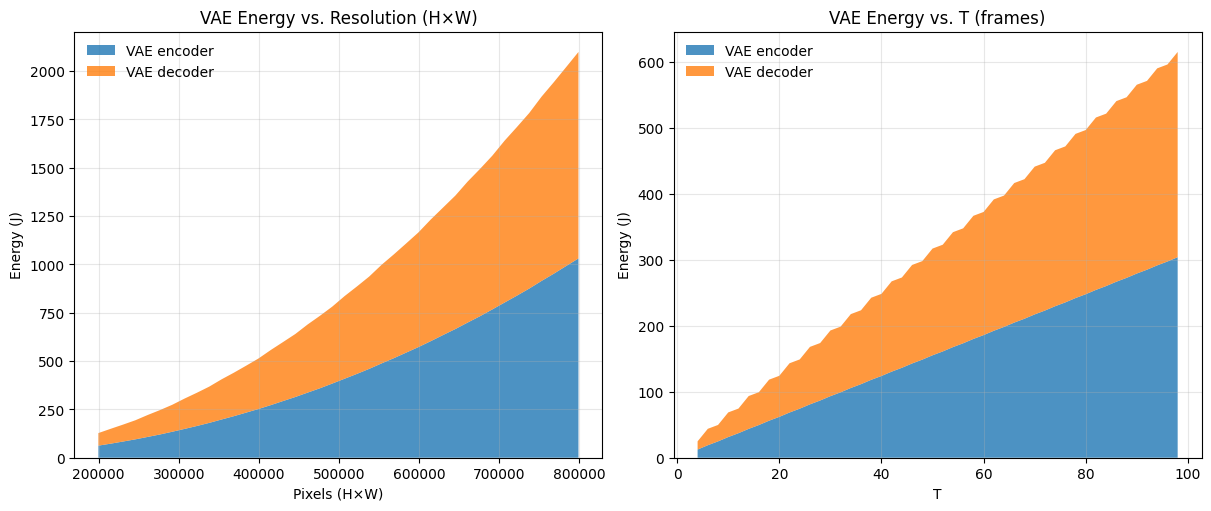

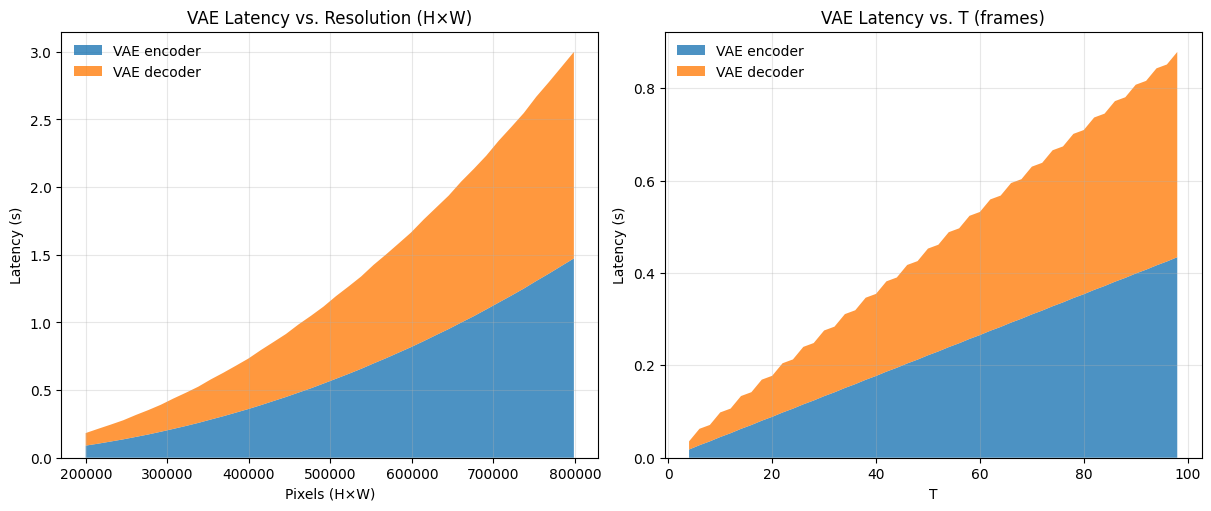

In [15]:
# =========================
# ====== CURVES (VAE) =====
# =========================
def build_curves_vary_scale(scale_values, T, H0, W0):
    E_comp, T_comp = {"enc": [], "dec": []}, {"enc": [], "dec": []}
    E_total, T_total = [], []
    for s in scale_values:
        H = int(round(H0 * s)); W = int(round(W0 * s))
        Fenc, Fdec = wan_vae_flops_exact(T, H, W)
        Ftot = Fenc + Fdec
        for k, F in [("enc", Fenc), ("dec", Fdec)]:
            t, e = latency_energy_from_flops(F, theta_peak, mu_eff, P_max, latency_overhead, energy_overhead)
            T_comp[k].append(t); E_comp[k].append(e)
        t_tot, e_tot = latency_energy_from_flops(Ftot, theta_peak, mu_eff, P_max, latency_overhead, energy_overhead)
        T_total.append(t_tot); E_total.append(e_tot)
    return (np.array(T_total), np.array(E_total),
            {k: np.array(v) for k,v in T_comp.items()},
            {k: np.array(v) for k,v in E_comp.items()})

def build_curves_vary_T(T_values, H, W):
    E_comp, T_comp = {"enc": [], "dec": []}, {"enc": [], "dec": []}
    E_total, T_total = [], []
    for T in T_values:
        Fenc, Fdec = wan_vae_flops_exact(T, H, W)
        Ftot = Fenc + Fdec
        for k, F in [("enc", Fenc), ("dec", Fdec)]:
            t, e = latency_energy_from_flops(F, theta_peak, mu_eff, P_max, latency_overhead, energy_overhead)
            T_comp[k].append(t); E_comp[k].append(e)
        t_tot, e_tot = latency_energy_from_flops(Ftot, theta_peak, mu_eff, P_max, latency_overhead, energy_overhead)
        T_total.append(t_tot); E_total.append(e_tot)
    return (np.array(T_total), np.array(E_total),
            {k: np.array(v) for k,v in T_comp.items()},
            {k: np.array(v) for k,v in E_comp.items()})

# =========================
# ======= PLOTS ===========
# =========================
def stacked_area(ax, x, comp_dict, title, xlabel, ylabel):
    order = ["enc", "dec"]
    labels = {"enc": "VAE encoder", "dec": "VAE decoder"}
    y = [comp_dict[k] for k in order]
    ax.stackplot(x, y, labels=[labels[k] for k in order], alpha=0.8)
    ax.set_title(title); ax.set_xlabel(xlabel); ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3); ax.legend(loc="upper left", frameon=False)

# ---- Build data (VAE only)
T_tot_sc, E_tot_sc, T_comp_sc, E_comp_sc = build_curves_vary_scale(scale_values, T0, H0, W0)
T_tot_T,  E_tot_T,  T_comp_T,  E_comp_T  = build_curves_vary_T(T_values, H0, W0)

# ---- Figure: Energy (2 subplots)
figE, axesE = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
stacked_area(
    axesE[0],
    scale_values*(H0*W0),
    E_comp_sc,
    title="VAE Energy vs. Resolution (H×W)",
    xlabel="Pixels (H×W)",
    ylabel="Energy (J)"
)
stacked_area(
    axesE[1],
    T_values,
    E_comp_T,
    title="VAE Energy vs. T (frames)",
    xlabel="T",
    ylabel="Energy (J)"
)

# ---- Figure: Latency (2 subplots)
figL, axesL = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
stacked_area(
    axesL[0],
    scale_values*(H0*W0),
    T_comp_sc,
    title="VAE Latency vs. Resolution (H×W)",
    xlabel="Pixels (H×W)",
    ylabel="Latency (s)"
)
stacked_area(
    axesL[1],
    T_values,
    T_comp_T,
    title="VAE Latency vs. T (frames)",
    xlabel="T",
    ylabel="Latency (s)"
)

plt.show()


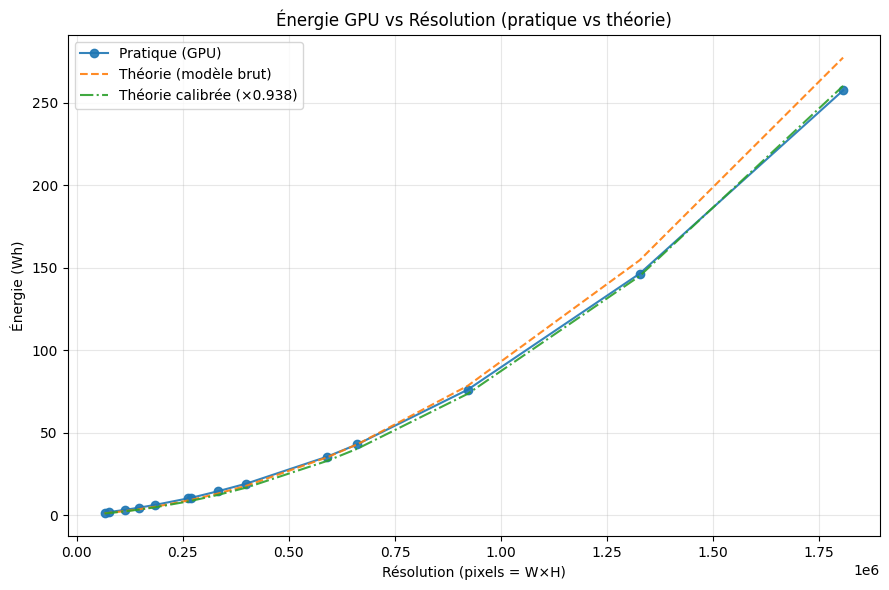

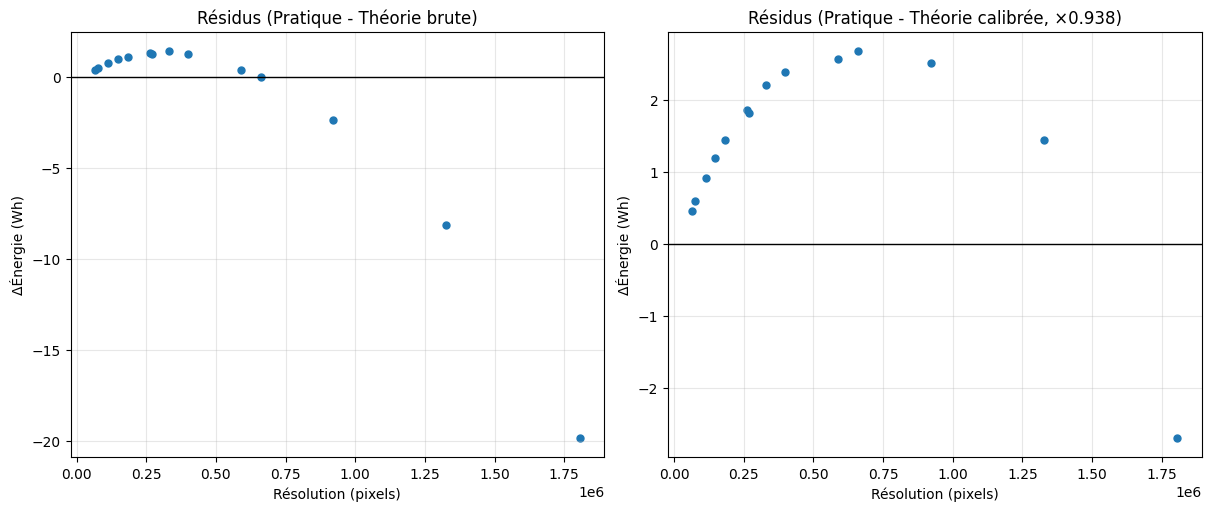

R² (théorie brute)     : 0.9931
R² (théorie calibrée)  : 0.9992
Facteur de calibration : c = 0.938


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========
# Helpers
# ==========
def predict_energy_wh(width, height, frames=None, steps=None):
    """
    Calcule l'énergie théorique (Wh) pour une config donnée.
    - frames / steps peuvent être None -> on prend les valeurs par défaut (T0, S0).
    - Utilise flops_total_breakdown + latency_energy_from_flops déjà définies.
    """
    T = int(frames) if frames is not None else T0
    S = int(steps)  if steps  is not None else S0
    H, W = int(height), int(width)

    fb = flops_total_breakdown(T, H, W, S, N, d, f_mlp, m_text)
    # énergie totale (J)
    _, E_j_tot = latency_energy_from_flops(
        fb["total"], theta_peak, mu_eff, P_max, latency_overhead, energy_overhead
    )
    # Joules -> Wh
    E_wh = E_j_tot / 3600.0
    return E_wh

def safe_col(df, name, default):
    """Retourne df[name] si dispo, sinon une série du même len remplie avec 'default'."""
    return df[name] if name in df.columns else pd.Series([default]*len(df), index=df.index)

# ==========
# Data prep
# ==========
# exp8_df doit contenir au minimum: width, height, energy_generate_gpu
# Si energy_generate_gpu est en kWh (courant), multiplie par 1000 -> Wh.
exp8_df = exp8_df.copy()
exp8_df["resolution"] = exp8_df["width"] * exp8_df["height"]
exp8_df_sorted = exp8_df.sort_values(by="resolution")

# Unités de mesure GPU observées :
# - Si ta colonne est déjà en Wh, mets scale_obs = 1.0
# - Si c'est en kWh (très probable), mets scale_obs = 1000.0
scale_obs = 1000.0  # <-- ajuste si besoin
E_obs_wh = exp8_df_sorted["energy_generate_gpu"] * scale_obs

# Frames/steps par ligne si dispo, sinon valeurs par défaut
frames_series = safe_col(exp8_df_sorted, "frames", T0)
steps_series  = safe_col(exp8_df_sorted, "sampling_steps", S0)

# ==========
# Theoretical energy
# ==========
E_th_wh = []
for (_, row), T_i, S_i in zip(exp8_df_sorted.iterrows(), frames_series, steps_series):
    E_th_wh.append(predict_energy_wh(row["width"], row["height"], frames=T_i, steps=S_i))
E_th_wh = np.array(E_th_wh)

# ==========
# Optional calibration (échelle globale pour compenser l’utilization réelle)
# On ajuste un scalaire c*E_th pour coller au mieux à E_obs en moindres carrés.
# Utile si mu_eff/P_max sont optimistes.
# ==========
num = np.dot(E_th_wh, E_obs_wh)
den = np.dot(E_th_wh, E_th_wh) + 1e-12
c_cal = float(num / den)
E_th_cal_wh = c_cal * E_th_wh

# ==========
# Plots
# ==========
plt.figure(figsize=(9, 6))
plt.plot(
    exp8_df_sorted["resolution"], E_obs_wh,
    marker="o", linestyle="-", label="Pratique (GPU)", alpha=0.9
)
plt.plot(
    exp8_df_sorted["resolution"], E_th_wh,
    marker=None, linestyle="--", label="Théorie (modèle brut)", alpha=0.9
)
plt.plot(
    exp8_df_sorted["resolution"], E_th_cal_wh,
    marker=None, linestyle="-.", label=f"Théorie calibrée (×{c_cal:.3f})", alpha=0.9
)
plt.title("Énergie GPU vs Résolution (pratique vs théorie)")
plt.xlabel("Résolution (pixels = W×H)")
plt.ylabel("Énergie (Wh)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# ==========
# Résidus
# ==========
resid_raw  = E_obs_wh - E_th_wh
resid_cal  = E_obs_wh - E_th_cal_wh

fig, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

ax[0].scatter(exp8_df_sorted["resolution"], resid_raw, s=25)
ax[0].axhline(0, color="black", lw=1)
ax[0].set_title("Résidus (Pratique - Théorie brute)")
ax[0].set_xlabel("Résolution (pixels)")
ax[0].set_ylabel("ΔÉnergie (Wh)")
ax[0].grid(True, alpha=0.3)

ax[1].scatter(exp8_df_sorted["resolution"], resid_cal, s=25)
ax[1].axhline(0, color="black", lw=1)
ax[1].set_title(f"Résidus (Pratique - Théorie calibrée, ×{c_cal:.3f})")
ax[1].set_xlabel("Résolution (pixels)")
ax[1].set_ylabel("ΔÉnergie (Wh)")
ax[1].grid(True, alpha=0.3)

plt.show()

# ==========
# Métriques simples
# ==========
def r2(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2) + 1e-12
    return 1 - ss_res/ss_tot

print(f"R² (théorie brute)     : {r2(E_obs_wh, E_th_wh):.4f}")
print(f"R² (théorie calibrée)  : {r2(E_obs_wh, E_th_cal_wh):.4f}")
print(f"Facteur de calibration : c = {c_cal:.3f}")


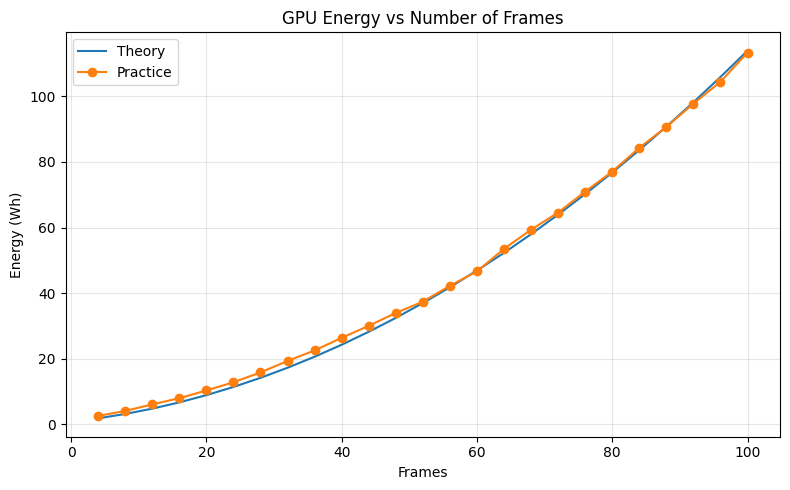

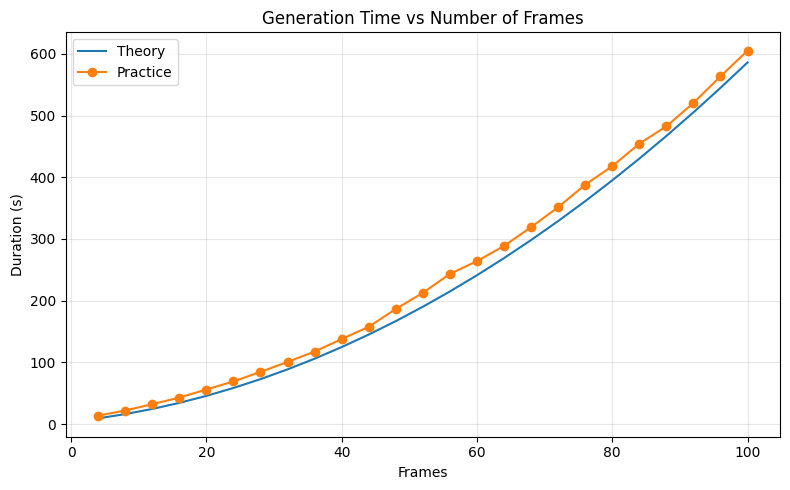

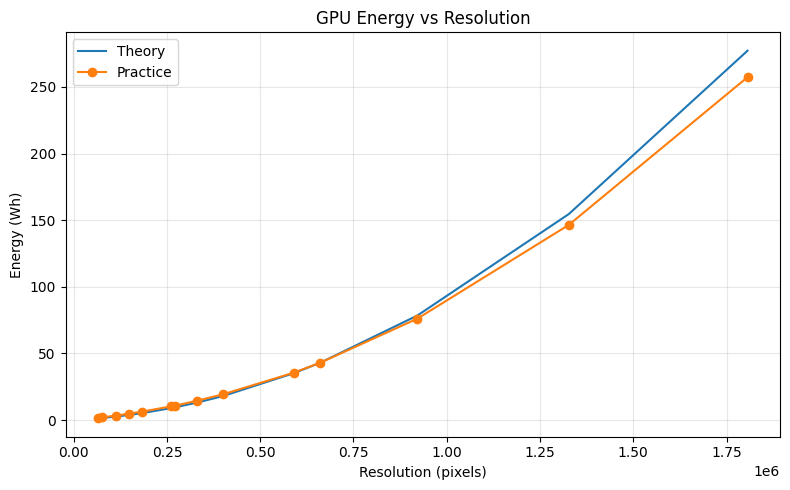

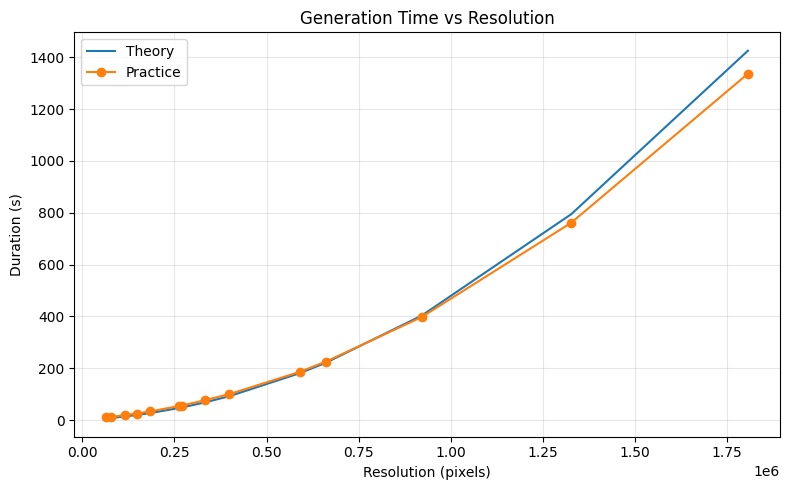

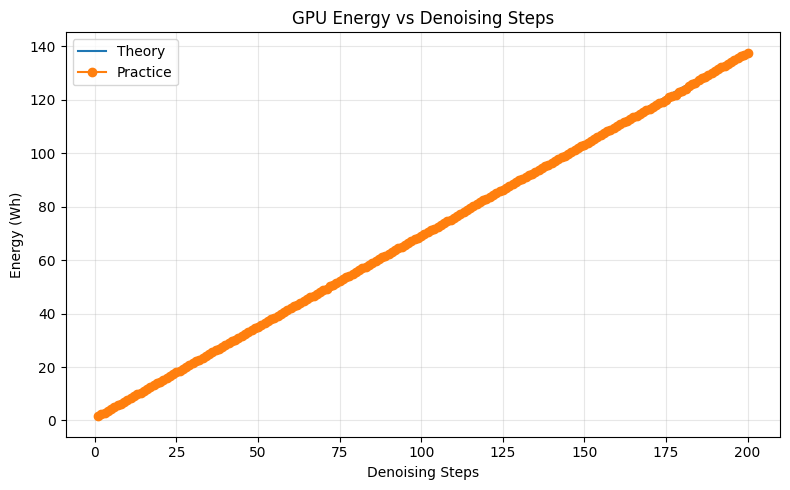

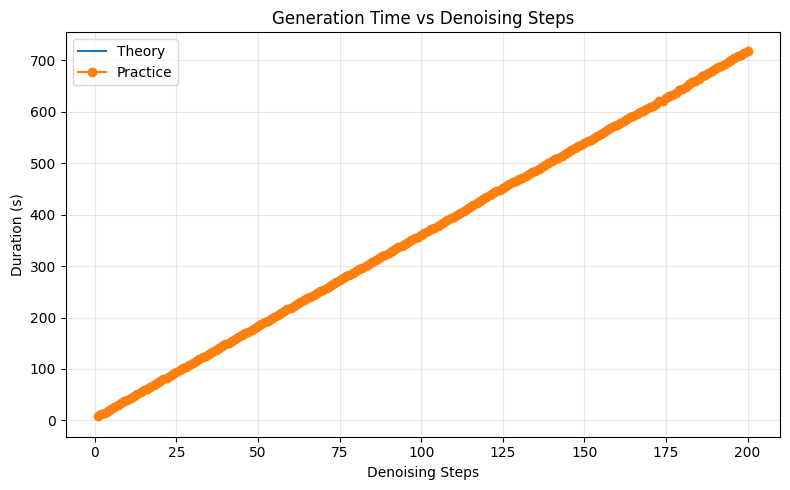

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Helper
def predict_theory(width, height, frames, steps):
    """
    Returns (E_theory_Wh, T_theory_s) for (W,H,T,S).
    """
    H, W = int(height), int(width)
    T, S = int(frames), int(steps)
    fb = flops_total_breakdown(T, H, W, S, N, d, f_mlp, m_text)
    T_s, E_j = latency_energy_from_flops(
        fb["total"], theta_peak, mu_eff, P_max, latency_overhead, energy_overhead
    )
    return (E_j / 3600.0), T_s  # Wh, s

OBS_ENERGY_TO_WH = 1000.0  # adjust: 1000 if your data is in kWh, 1 if already in Wh

# ======================================================
# A) Experiment 7 — vary number of frames
# ======================================================
df7 = exp7_df[exp7_df['num_frames'] % 4 == 0].sort_values(by='num_frames').copy()
if 'width' not in df7:  df7['width']  = W0
if 'height' not in df7: df7['height'] = H0
if 'steps' not in df7:  df7['steps']  = S0

E_th, T_th = [], []
for _, r in df7.iterrows():
    E, T = predict_theory(r['width'], r['height'], r['num_frames'], r['steps'])
    E_th.append(E); T_th.append(T)
E_obs = df7['energy_generate_gpu'].to_numpy() * OBS_ENERGY_TO_WH
T_obs = df7['duration_generate'].to_numpy()

plt.figure(figsize=(8,5))
plt.plot(df7['num_frames'], E_th, label="Theory", color="tab:blue")
plt.plot(df7['num_frames'], E_obs, label="Practice", color="tab:orange", marker="o")
plt.title("GPU Energy vs Number of Frames")
plt.xlabel("Frames")
plt.ylabel("Energy (Wh)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.plot(df7['num_frames'], T_th, label="Theory", color="tab:blue")
plt.plot(df7['num_frames'], T_obs, label="Practice", color="tab:orange", marker="o")
plt.title("Generation Time vs Number of Frames")
plt.xlabel("Frames")
plt.ylabel("Duration (s)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()


# ======================================================
# B) Experiment 8 — vary resolution
# ======================================================
df8 = exp8_df.copy()
if 'num_frames' not in df8: df8['num_frames'] = T0
if 'steps' not in df8:      df8['steps']      = S0
df8['resolution'] = df8['width'] * df8['height']
df8 = df8.sort_values(by='resolution')

E_th, T_th = [], []
for _, r in df8.iterrows():
    E, T = predict_theory(r['width'], r['height'], r['num_frames'], r['steps'])
    E_th.append(E); T_th.append(T)
E_obs = df8['energy_generate_gpu'].to_numpy() * OBS_ENERGY_TO_WH
T_obs = df8['duration_generate'].to_numpy()

plt.figure(figsize=(8,5))
plt.plot(df8['resolution'], E_th, label="Theory", color="tab:blue")
plt.plot(df8['resolution'], E_obs, label="Practice", color="tab:orange", marker="o")
plt.title("GPU Energy vs Resolution")
plt.xlabel("Resolution (pixels)")
plt.ylabel("Energy (Wh)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.plot(df8['resolution'], T_th, label="Theory", color="tab:blue")
plt.plot(df8['resolution'], T_obs, label="Practice", color="tab:orange", marker="o")
plt.title("Generation Time vs Resolution")
plt.xlabel("Resolution (pixels)")
plt.ylabel("Duration (s)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()


# ======================================================
# C) Experiment 9 — vary number of steps
# ======================================================
df9 = exp9_df.sort_values(by='steps').copy()
if 'width' not in df9:      df9['width']      = W0
if 'height' not in df9:     df9['height']     = H0
if 'num_frames' not in df9: df9['num_frames'] = T0

E_th, T_th = [], []
for _, r in df9.iterrows():
    E, T = predict_theory(r['width'], r['height'], r['num_frames'], r['steps'])
    E_th.append(E); T_th.append(T)
E_obs = df9['energy_generate_gpu'].to_numpy() * OBS_ENERGY_TO_WH
T_obs = df9['duration_generate'].to_numpy()

plt.figure(figsize=(8,5))
plt.plot(df9['steps'], E_th, label="Theory", color="tab:blue")
plt.plot(df9['steps'], E_obs, label="Practice", color="tab:orange", marker="o")
plt.title("GPU Energy vs Denoising Steps")
plt.xlabel("Denoising Steps")
plt.ylabel("Energy (Wh)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.plot(df9['steps'], T_th, label="Theory", color="tab:blue")
plt.plot(df9['steps'], T_obs, label="Practice", color="tab:orange", marker="o")
plt.title("Generation Time vs Denoising Steps")
plt.xlabel("Denoising Steps")
plt.ylabel("Duration (s)")
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()


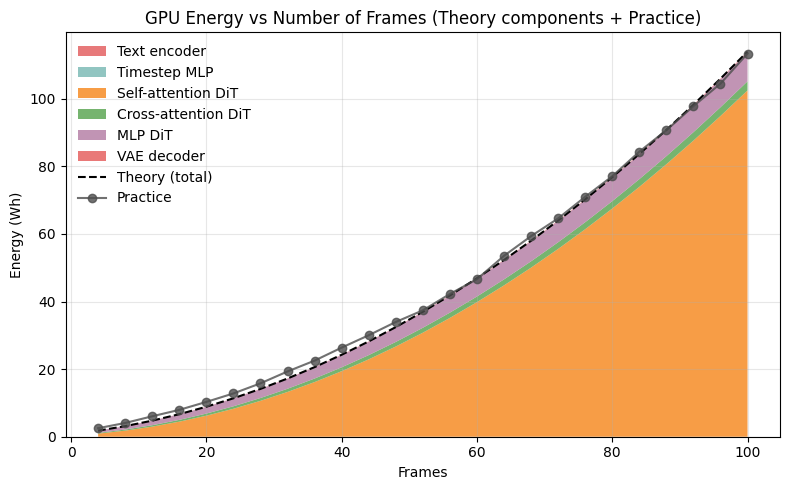

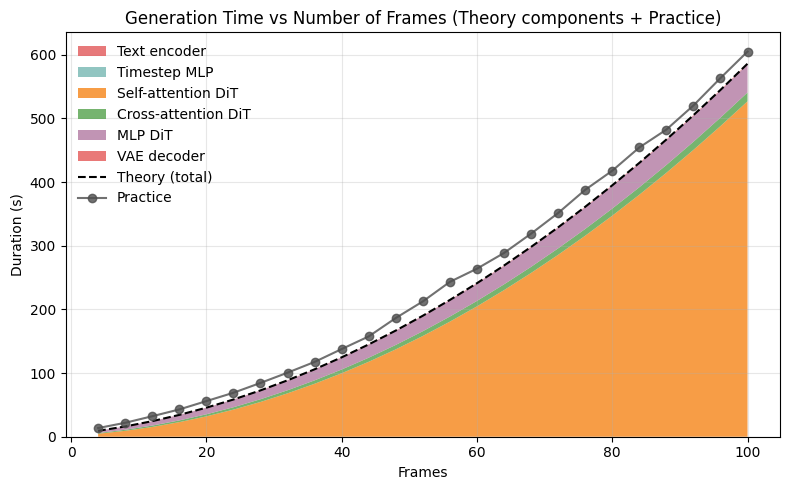

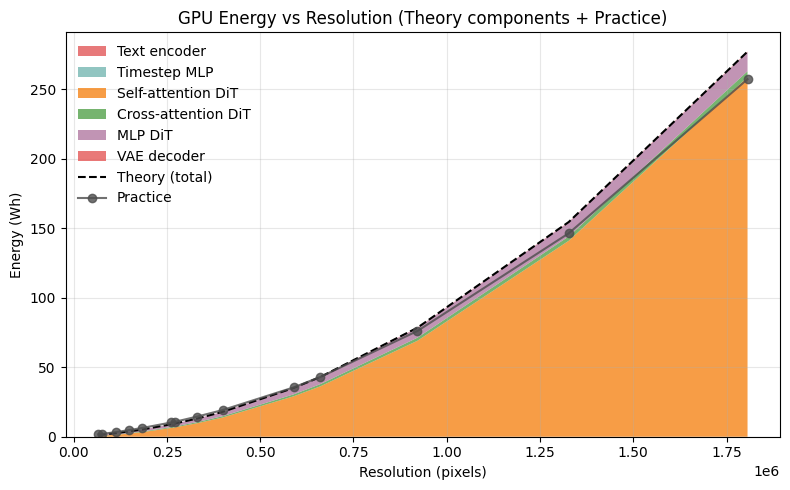

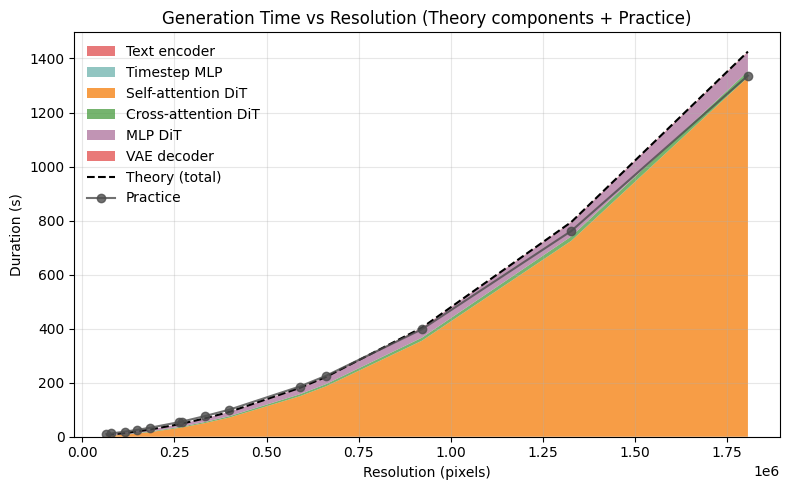

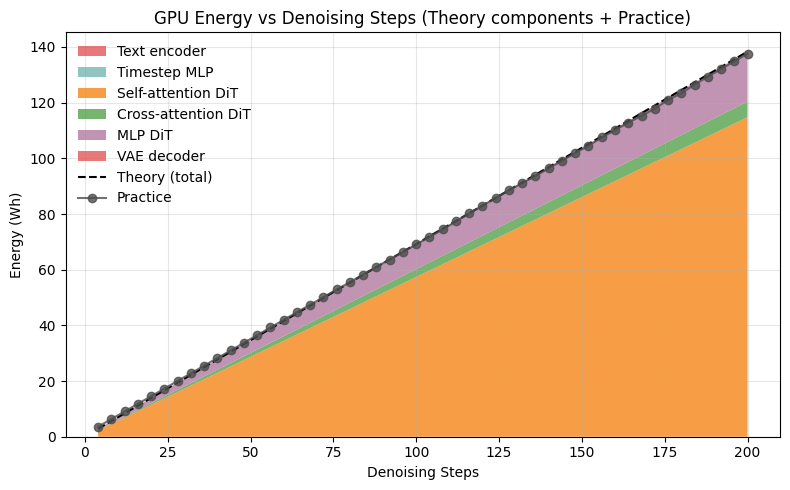

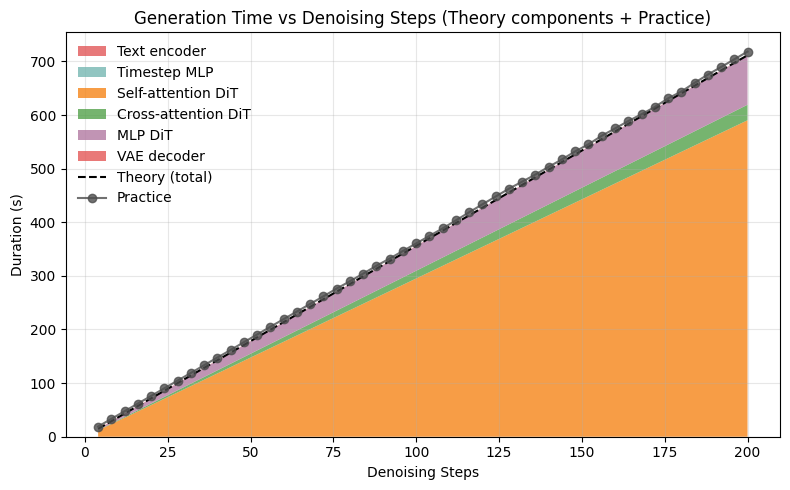

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========
# Assumptions / inputs already available in your scope:
# - DataFrames: exp7_df, exp8_df, exp9_df
# - Functions: flops_total_breakdown(T,H,W,S,N,d,f_mlp,m_text) and
#              latency_energy_from_flops(F, theta_peak, mu_eff, P_max, latency_overhead, energy_overhead)
# - Hyperparams: T0, H0, W0, S0, N, d, f_mlp, m_text, theta_peak, mu_eff, P_max, latency_overhead, energy_overhead
# ==========

# If your measured energy is in kWh (typical), convert to Wh; set to 1.0 if it's already Wh
OBS_ENERGY_TO_WH = 1000.0

COMP_ORDER = ["text", "temb", "self", "cross", "mlp", "dec"]
COMP_LABELS = {
    "text": "Text encoder",
    "temb": "Timestep MLP",
    "self": "Self-attention DiT",
    "cross":"Cross-attention DiT",
    "mlp":  "MLP DiT",
    "dec":  "VAE decoder",
}
# Fixed color palette for components (distinct but readable)
COMP_COLORS = {
    "text": "#E15759",  # red
    "temb": "#76B7B2",  # teal
    "self": "#F58518",  # orange
    "cross":"#54A24B",  # green
    "mlp":  "#B279A2",  # purple
    "dec":  "#E45756",  # red
}

def theory_components_wh_s(T, H, W, S):
    """
    Return component-wise theory for a single config:
    - energy (Wh) dict per component
    - duration (s)   dict per component
    Also returns totals.
    """
    fb = flops_total_breakdown(T, H, W, S, N, d, f_mlp, m_text)
    e_wh, t_s = {}, {}
    for k in COMP_ORDER:
        t, e = latency_energy_from_flops(
            fb[k], theta_peak, mu_eff, P_max, latency_overhead, energy_overhead
        )
        e_wh[k] = e / 3600.0
        t_s[k]  = t
    return e_wh, t_s, sum(e_wh.values()), sum(t_s.values())
def build_series(df, x_col, w_col, h_col, t_col, s_col):
    """
    For each row of df, compute component-wise theory (Wh and s) and collect practice series.
    Returns:
      x_values
      energy_comp: dict of np.arrays per component
      time_comp:   dict of np.arrays per component
      energy_obs:  np.array
      time_obs:    np.array
      energy_tot_theory: np.array
      time_tot_theory:   np.array
    """
    xs = df[x_col].to_numpy()
    e_comp = {k: [] for k in COMP_ORDER}
    t_comp = {k: [] for k in COMP_ORDER}
    e_tot, t_tot = [], []

    for _, r in df.iterrows():
        e_wh_dict, t_s_dict, e_total, t_total = theory_components_wh_s(
            int(r[t_col]), int(r[h_col]), int(r[w_col]), int(r[s_col])
        )
        for k in COMP_ORDER:
            e_comp[k].append(e_wh_dict[k])
            t_comp[k].append(t_s_dict[k])
        e_tot.append(e_total)
        t_tot.append(t_total)

    # convert to arrays
    for k in COMP_ORDER:
        e_comp[k] = np.array(e_comp[k])
        t_comp[k] = np.array(t_comp[k])

    e_tot = np.array(e_tot)
    t_tot = np.array(t_tot)

    e_obs = df['energy_generate_gpu'].to_numpy() * OBS_ENERGY_TO_WH
    t_obs = df['duration_generate'].to_numpy()

    return xs, e_comp, t_comp, e_obs, t_obs, e_tot, t_tot


def stacked_theory_with_practice(ax, x, comp_dict, obs, title, xlabel, ylabel, show_total_outline=True):
    """
    Draw a stacked area (theory components) with a practice line overlaid.
    """
    # Prepare stacked arrays in fixed order
    ys = [comp_dict[k] for k in COMP_ORDER]
    labels = [COMP_LABELS[k] for k in COMP_ORDER]
    colors = [COMP_COLORS[k] for k in COMP_ORDER]
    ax.stackplot(x, ys, labels=labels, colors=colors, alpha=0.8, linewidth=0.5)

    if show_total_outline:
        total_theory = np.sum(np.vstack(ys), axis=0)
        ax.plot(x, total_theory, color="black", linestyle="--", linewidth=1.5, label="Theory (total)")

    # Practice overlay
    ax.plot(x, obs, color="#4d4d4d", marker="o", linestyle="-", linewidth=1.5, label="Practice", alpha=0.8)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3)
    ax.legend(loc="upper left", frameon=False)

# =========================
# A) Experiment 7 — vary number of frames
# =========================
df7 = exp7_df[exp7_df['num_frames'] % 4 == 0].copy()
if 'width'  not in df7.columns:  df7['width']  = W0
if 'height' not in df7.columns:  df7['height'] = H0
if 'steps'  not in df7.columns:  df7['steps']  = S0
df7 = df7.sort_values(by='num_frames')

x7, e_comp7, t_comp7, e_obs7, t_obs7, e_tot7, t_tot7 = build_series(
    df7, x_col='num_frames', w_col='width', h_col='height', t_col='num_frames', s_col='steps'
)

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x7, e_comp7, e_obs7,
    title="GPU Energy vs Number of Frames (Theory components + Practice)",
    xlabel="Frames", ylabel="Energy (Wh)"
)
plt.savefig("./results/energy_vs_frames.png", dpi=300)
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x7, t_comp7, t_obs7,
    title="Generation Time vs Number of Frames (Theory components + Practice)",
    xlabel="Frames", ylabel="Duration (s)"
)
plt.savefig("./results/time_vs_frames.png", dpi=300)
plt.tight_layout(); plt.show()

# =========================
# B) Experiment 8 — vary resolution
# =========================
df8 = exp8_df.copy()
if 'num_frames' not in df8.columns: df8['num_frames'] = T0
if 'steps'      not in df8.columns: df8['steps']      = S0
df8['resolution'] = df8['width'] * df8['height']
df8 = df8.sort_values(by='resolution')

x8, e_comp8, t_comp8, e_obs8, t_obs8, e_tot8, t_tot8 = build_series(
    df8, x_col='resolution', w_col='width', h_col='height', t_col='num_frames', s_col='steps'
)

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x8, e_comp8, e_obs8,
    title="GPU Energy vs Resolution (Theory components + Practice)",
    xlabel="Resolution (pixels)", ylabel="Energy (Wh)"
)
plt.savefig("./results/energy_vs_resolution.png", dpi=300)
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x8, t_comp8, t_obs8,
    title="Generation Time vs Resolution (Theory components + Practice)",
    xlabel="Resolution (pixels)", ylabel="Duration (s)"
)
plt.savefig("./results/time_vs_resolution.png", dpi=300)
plt.tight_layout(); plt.show()

# =========================
# C) Experiment 9 — vary denoising steps
# =========================
df9 = exp9_df.copy()
if 'width'      not in df9.columns: df9['width']      = W0
if 'height'     not in df9.columns: df9['height']     = H0
if 'num_frames' not in df9.columns: df9['num_frames'] = T0

# 🔹 Ne garder que les steps multiples de 4
df9 = df9[df9['steps'] % 4 == 0].copy()

# 🔹 Optionnel : sous-échantillonnage pour alléger encore (1 point sur 2)
# df9 = df9.iloc[::2]

df9 = df9.sort_values(by='steps')

x9, e_comp9, t_comp9, e_obs9, t_obs9, e_tot9, t_tot9 = build_series(
    df9, x_col='steps', w_col='width', h_col='height', t_col='num_frames', s_col='steps'
)

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x9, e_comp9, e_obs9,
    title="GPU Energy vs Denoising Steps (Theory components + Practice)",
    xlabel="Denoising Steps", ylabel="Energy (Wh)"
)
plt.savefig("./results/energy_vs_steps.png", dpi=300)
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
ax = plt.gca()
stacked_theory_with_practice(
    ax, x9, t_comp9, t_obs9,
    title="Generation Time vs Denoising Steps (Theory components + Practice)",
    xlabel="Denoising Steps", ylabel="Duration (s)"
)
plt.savefig("./results/time_vs_steps.png", dpi=300)
plt.tight_layout(); plt.show()



In [ ]:
import numpy as np

def estimate_mu_and_overhead_from_dfs(dfs, theta_peak, build_args):
    """
    dfs: liste de DataFrames contenant colonnes: width, height, num_frames, steps, duration_generate
    theta_peak: FLOP/s (cohérent avec ton mode: BF16 vs FP8)
    build_args: dict avec N, d, f_mlp, m_text, etc. passés à flops_total_breakdown
    
    Retourne: mu_hat, b_hat (overhead en secondes), R2
    """
    F_list, T_list = [], []
    for df in dfs:
        for _, r in df.iterrows():
            fb = flops_total_breakdown(
                int(r['num_frames']), int(r['height']), int(r['width']),
                int(r['steps']),
                build_args['N'], build_args['d'], build_args['f_mlp'],
                build_args['m_text']
            )
            F_list.append(fb['total'])
            T_list.append(float(r['duration_generate']))
    F = np.asarray(F_list)
    T = np.asarray(T_list)

    # Fit T = a F + b (moindres carrés fermés)
    # [a, b] = (X^T X)^{-1} X^T T, X=[F, 1]
    X = np.column_stack([F, np.ones_like(F)])
    coeff, _, _, _ = np.linalg.lstsq(X, T, rcond=None)
    a_hat, b_hat = coeff[0], coeff[1]

    # mu = 1 / (a * theta_peak)
    mu_hat = 1.0 / (a_hat * theta_peak)

    # R^2
    T_pred = a_hat * F + b_hat
    ss_res = np.sum((T - T_pred)**2)
    ss_tot = np.sum((T - np.mean(T))**2)
    R2 = 1.0 - ss_res / ss_tot if ss_tot > 0 else np.nan

    # bornes raisonnables
    mu_hat = float(np.clip(mu_hat, 1e-3, 1.0))
    return mu_hat, float(b_hat), float(R2)

# Ex d’usage:
build_args = dict(N=N, d=d, f_mlp=f_mlp, m_text=m_text)
mu_hat, b_hat, R2 = estimate_mu_and_overhead_from_dfs([exp7_df, exp8_df, exp9_df], theta_peak, build_args)
print(f"mu={mu_hat:.3f}, latency_overhead={b_hat:.3f}s, R2={R2:.4f}")


In [ ]:
import numpy as np
from scipy.optimize import nnls  # si tu préfères rester 100% numpy, je te donne plus bas une variante simple

COMP_KEYS = ["text","temb","self","cross","mlp","dec"]

def estimate_component_mus_nnls(dfs, theta_peak, build_args):
    """
    Fit T ≈ sum_k a_k * F_k + b via NNLS en étendant X avec une colonne de 1 pour b.
    Retourne: dict mu_k, b_hat, R2
    """
    F_rows, T_list = [], []
    for df in dfs:
        for _, r in df.iterrows():
            fb = flops_total_breakdown(
                int(r['num_frames']), int(r['height']), int(r['width']),
                int(r['steps']),
                build_args['N'], build_args['d'], build_args['f_mlp'],
                build_args['m_text']
            )
            F_rows.append([fb[k] for k in COMP_KEYS] + [1.0])  # +1 pour le biais b
            T_list.append(float(r['duration_generate']))
    X = np.asarray(F_rows)          # shape (n, K+1)   (dernière col = 1)
    T = np.asarray(T_list)          # shape (n, )

    # NNLS ne gère pas directement le biais; astuce: on autorise b >= 0 (souvent OK en pratique)
    a_ext, _ = nnls(X, T)           # a_ext = [a_k..., b]
    a_k, b_hat = a_ext[:-1], a_ext[-1]

    # Mus par composant
    mu_k = {k: float(1.0 / (ak * theta_peak)) if ak > 0 else 1.0 for k, ak in zip(COMP_KEYS, a_k)}
    # clamp sensé
    for k in mu_k:
        mu_k[k] = float(np.clip(mu_k[k], 1e-3, 1.0))

    # R^2
    T_pred = X @ a_ext
    ss_res = np.sum((T - T_pred)**2)
    ss_tot = np.sum((T - np.mean(T))**2)
    R2 = 1.0 - ss_res / ss_tot if ss_tot > 0 else np.nan

    return mu_k, float(b_hat), float(R2)

# Ex d’usage:
mu_k, b_hat_comp, R2_comp = estimate_component_mus_nnls([exp7_df, exp8_df, exp9_df], theta_peak, build_args)
print("mu_k =", {k: round(v,3) for k,v in mu_k.items()}, "b=", round(b_hat_comp,3), "R2=", round(R2_comp,4))
